In [1]:
################################################################################
!nvidia-smi

Sat Jul 30 11:28:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 238 kB 4.8 MB/s 


In [4]:
# %tensorflow_version 
import tensorflow
import tensorflow_model_optimization as tfmot

In [5]:
from sklearn.utils import shuffle
import numpy as np
import scipy.io
def preprocess():
    # def sample data function to:  p01 without overlabs
    #                 1. introduce datas
    #                   2. shuffle data in each class
    #                     3. attached subject's datas together

    ##################################################################
    #####   A CROSS SUBJECT
    ### (60,800,426)  ,  (60,800,386)
    ######     A >>>>> P01
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/P01/A_p01_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/P01/A_p01_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(426,60,800)
    ytrain = ytrain['ytrain']
      
    A = xtrain[0:72,:,:]   # 72 samples from 72
    B = xtrain[72:144,:,:]
    C = xtrain[144:216,:,:]
    D = xtrain[216:288,:,:]
    E = xtrain[288:360,:,:]
      
    FP = xtrain[360:426,:,:]  # 66 samples from 66
    FQ = xtrain[370:378,:,:]  
    F = np.concatenate((FP,FQ),axis=0)
      
    AA = ytrain[0:72,]
    BB = ytrain[72:144,]
    CC = ytrain[144:216,]
    DD = ytrain[216:288,]
    EE = ytrain[288:360,]
      
    FP = ytrain[360:426,]   # 66 samples from 66
    FQ = ytrain[370:378,]  
    FF = np.concatenate((FP,FQ),axis=0)
      
    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:50,:,:]   #train 50
    aa = X[50:61,:,:]  #valid  11
    aaa = X[61:72,:,:]  #test  11
      
    b = X[72:122,:,:]
    bb = X[122:133,:,:]
    bbb = X[133:144,:,:]
      
    c = X[144:194,:,:]
    cc = X[194:205,:,:]
    ccc = X[205:216,:,:]
      
    d = X[216:266,:,:]
    dd = X[266:277,:,:]
    ddd = X[277:288,:,:]
      
    e = X[288:338,:,:]
    ee = X[338:349,:,:]
    eee = X[349:360,:,:]
      
    f = X[360:410,:,:]
    ff = X[410:421,:,:]
    fff = X[421:432,:,:]
      
    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train1 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid1 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test1 = np.concatenate((ppp,ggg),axis=0)

    h = Y[0:50,]    #train
    hh = Y[50:61,]    #valid
    hhh = Y[61:72,]     #test
      
    i = Y[72:122,]
    ii = Y[122:133,]
    iii = Y[133:144,]
      
    j = Y[144:194,]
    jj = Y[194:205,]
    jjj = Y[205:216,]
      
    k = Y[216:266,]
    kk = Y[266:277,]
    kkk = Y[277:288,]

    l = Y[288:338,]
    ll = Y[338:349,]
    lll = Y[349:360,]
      
    m = Y[360:410,:]
    mm = Y[410:421,:]
    mmm = Y[421:432,:]
    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train1 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid1 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test1 = np.concatenate((nnn,ooo),axis=0)

    X_train1 , Y_train1 = shuffle(X_train1 , Y_train1 , random_state=0)
    X_test1  , Y_test1  = shuffle(X_test1  , Y_test1  , random_state=0)
    X_valid1 , Y_valid1 = shuffle(X_valid1 , Y_valid1 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train1 = X_train1.reshape(X_train1.shape[0],1, 60, 800)
    X_valid1 = X_valid1.reshape(X_valid1.shape[0],1, 60, 800)
    X_test1 = X_test1.reshape(X_test1.shape[0],1, 60, 800)
    print("==========================")
    print('X_train1 shape:', X_train1.shape)
    print('X_test1 shape:', X_test1.shape)
    print('X_valid1 shape:', X_valid1.shape)
    print(X_train1.shape[0], 'train1 samples')
    print(X_test1.shape[0], 'test1 samples')
    print(X_valid1.shape[0], 'validate1 samples')

    ######  A P02
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p02/A_p02_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p02/A_p02_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(426,60,800)
    ytrain = ytrain['ytrain']
      
    A = xtrain[0:72,:,:]   # 72 samples from 72
    B = xtrain[72:144,:,:]
    C = xtrain[144:216,:,:]
    D = xtrain[216:288,:,:]
    E = xtrain[288:360,:,:]
      
    FP = xtrain[360:426,:,:]  # 66 samples from 66
    FQ = xtrain[370:378,:,:]  
    F = np.concatenate((FP,FQ),axis=0)
      
    AA = ytrain[0:72,]
    BB = ytrain[72:144,]
    CC = ytrain[144:216,]
    DD = ytrain[216:288,]
    EE = ytrain[288:360,]
      
    FP = ytrain[360:426,]   # 66 samples from 66
    FQ = ytrain[370:378,]  
    FF = np.concatenate((FP,FQ),axis=0)
      
    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:50,:,:]   #train 50
    aa = X[50:61,:,:]  #valid  11
    aaa = X[61:72,:,:]  #test  11
      
    b = X[72:122,:,:]
    bb = X[122:133,:,:]
    bbb = X[133:144,:,:]
      
    c = X[144:194,:,:]
    cc = X[194:205,:,:]
    ccc = X[205:216,:,:]
      
    d = X[216:266,:,:]
    dd = X[266:277,:,:]
    ddd = X[277:288,:,:]
      
    e = X[288:338,:,:]
    ee = X[338:349,:,:]
    eee = X[349:360,:,:]
      
    f = X[360:410,:,:]
    ff = X[410:421,:,:]
    fff = X[421:432,:,:]
      
    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train2 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid2 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test2 = np.concatenate((ppp,ggg),axis=0)
    h = Y[0:50,]    #train
    hh = Y[50:61,]    #valid
    hhh = Y[61:72,]     #test
      
    i = Y[72:122,]
    ii = Y[122:133,]
    iii = Y[133:144,]
      
    j = Y[144:194,]
    jj = Y[194:205,]
    jjj = Y[205:216,]
      
    k = Y[216:266,]
    kk = Y[266:277,]
    kkk = Y[277:288,]

    l = Y[288:338,]
    ll = Y[338:349,]
    lll = Y[349:360,]
      
    m = Y[360:410,:]
    mm = Y[410:421,:]
    mmm = Y[421:432,:]
    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train2 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid2 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test2 = np.concatenate((nnn,ooo),axis=0)

    X_train2 , Y_train2 = shuffle(X_train2 , Y_train2 , random_state=0)
    X_test2  , Y_test2  = shuffle(X_test2  , Y_test2  , random_state=0)
    X_valid2 , Y_valid2 = shuffle(X_valid2 , Y_valid2 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train2 = X_train2.reshape(X_train2.shape[0],1, 60, 800)
    X_valid2 = X_valid2.reshape(X_valid2.shape[0],1, 60, 800)
    X_test2 = X_test2.reshape(X_test2.shape[0],1, 60, 800)
    print("==========================")
    print('X_train2 shape:', X_train2.shape)
    print('X_test2 shape:', X_test2.shape)
    print('X_valid2 shape:', X_valid2.shape)
    print(X_train2.shape[0], 'train2 samples')
    print(X_test2.shape[0], 'test2 samples')
    print(X_valid2.shape[0], 'validate2 samples')

    ######   A P05
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/P05/A_p05_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/P05/A_p05_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(426,60,800)
    ytrain = ytrain['ytrain']

    A = xtrain[0:72,:,:]   # 72 samples from 72
    B = xtrain[72:144,:,:]
    C = xtrain[144:216,:,:]
    D = xtrain[216:288,:,:]
    E = xtrain[288:360,:,:]
      
    FP = xtrain[360:426,:,:]  # 66 samples from 66
    FQ = xtrain[370:378,:,:]  
    F = np.concatenate((FP,FQ),axis=0)
      
    AA = ytrain[0:72,]
    BB = ytrain[72:144,]
    CC = ytrain[144:216,]
    DD = ytrain[216:288,]
    EE = ytrain[288:360,]
      
    FP = ytrain[360:426,]   # 66 samples from 66
    FQ = ytrain[370:378,]  
    FF = np.concatenate((FP,FQ),axis=0)

    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:50,:,:]   #train 50
    aa = X[50:61,:,:]  #valid  11
    aaa = X[61:72,:,:]  #test  11

    b = X[72:122,:,:]
    bb = X[122:133,:,:]
    bbb = X[133:144,:,:]

    c = X[144:194,:,:]
    cc = X[194:205,:,:]
    ccc = X[205:216,:,:]

    d = X[216:266,:,:]
    dd = X[266:277,:,:]
    ddd = X[277:288,:,:]

    e = X[288:338,:,:]
    ee = X[338:349,:,:]
    eee = X[349:360,:,:]

    f = X[360:410,:,:]
    ff = X[410:421,:,:]
    fff = X[421:432,:,:]

    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train5 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid5 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test5 = np.concatenate((ppp,ggg),axis=0)
    h = Y[0:50,]    #train
    hh = Y[50:61,]    #valid
    hhh = Y[61:72,]     #test

    i = Y[72:122,]
    ii = Y[122:133,]
    iii = Y[133:144,]

    j = Y[144:194,]
    jj = Y[194:205,]
    jjj = Y[205:216,]

    k = Y[216:266,]
    kk = Y[266:277,]
    kkk = Y[277:288,]

    l = Y[288:338,]
    ll = Y[338:349,]
    lll = Y[349:360,]

    m = Y[360:410,:]
    mm = Y[410:421,:]
    mmm = Y[421:432,:]
    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train5 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid5 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test5 = np.concatenate((nnn,ooo),axis=0)

    X_train5 , Y_train5 = shuffle(X_train5 , Y_train5 , random_state=0)
    X_test5 , Y_test5  = shuffle(X_test5  , Y_test5  , random_state=0)
    X_valid5 , Y_valid5 = shuffle(X_valid5 , Y_valid5 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train5 = X_train5.reshape(X_train5.shape[0],1, 60, 800)
    X_valid5 = X_valid5.reshape(X_valid5.shape[0],1, 60, 800)
    X_test5 = X_test5.reshape(X_test5.shape[0],1, 60, 800)
    print("==========================")
    print('X_train5 shape:', X_train5.shape)
    print('X_test5 shape:', X_test5.shape)
    print('X_valid5 shape:', X_valid5.shape)
    print(X_train5.shape[0], 'train5 samples')
    print(X_test5.shape[0], 'test5 samples')
    print(X_valid5.shape[0], 'validate5 samples')

    ######   A  P07
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/P07/A_p07_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/P07/A_p07_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(386,60,800)
    ytrain = ytrain['ytrain']

    A = xtrain[0:64,:,:]   # 64 samples from 64
    B = xtrain[64:128,:,:]
    C = xtrain[128:192,:,:]
    D = xtrain[192:256,:,:]
    E = xtrain[256:320,:,:]
    F = xtrain[320:384,:,:]  # 64 samples from 66

    AA = ytrain[0:64,]
    BB = ytrain[64:128,]
    CC = ytrain[128:192,]
    DD = ytrain[192:256,]
    EE = ytrain[256:320,]
    FF = ytrain[320:384,]   # 64 samples from 66

    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:46,:,:]   #train 46
    aa = X[46:55,:,:]  #valid  9
    aaa = X[55:64,:,:]  #test  9

    b = X[64:110,:,:]
    bb = X[110:119,:,:]
    bbb = X[119:128,:,:]


    c = X[128:174,:,:]
    cc = X[174:183,:,:]
    ccc = X[183:192,:,:]


    d = X[192:238,:,:]
    dd = X[238:247,:,:]
    ddd = X[247:256,:,:]


    e = X[256:302,:,:]
    ee = X[302:311,:,:]
    eee = X[311:320,:,:]

    f = X[320:366,:,:]
    ff = X[366:375,:,:]
    fff = X[375:384,:,:]

    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train7 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid7 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test7 = np.concatenate((ppp,ggg),axis=0)

    h = Y[0:46,]    #train
    hh = Y[46:55,]    #valid
    hhh = Y[55:64,]     #test

    i = Y[64:110,]
    ii = Y[110:119,]
    iii = Y[119:128,]

    j = Y[128:174,]
    jj = Y[174:183,]
    jjj = Y[183:192,]

    k = Y[192:238,]
    kk = Y[238:247,]
    kkk = Y[247:256,]

    l = Y[256:302,]
    ll = Y[302:311,]
    lll = Y[311:320,]

    m = Y[320:366,:]
    mm = Y[366:375,:]
    mmm = Y[375:384,:]

    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train7 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid7 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test7 = np.concatenate((nnn,ooo),axis=0)

    X_train7 , Y_train7 = shuffle(X_train7 , Y_train7 , random_state=0)
    X_test7  , Y_test7  = shuffle(X_test7  , Y_test7  , random_state=0)
    X_valid7 , Y_valid7 = shuffle(X_valid7 , Y_valid7 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train7 = X_train7.reshape(X_train7.shape[0],1, 60, 800)
    X_valid7 = X_valid7.reshape(X_valid7.shape[0],1, 60, 800)
    X_test7 = X_test7.reshape(X_test7.shape[0],1, 60, 800)
    print("==========================")
    print('X_train7 shape:', X_train7.shape)
    print('X_test7 shape:', X_test7.shape)
    print('X_valid7 shape:', X_valid7.shape)
    print(X_train7.shape[0], 'train7 samples')
    print(X_test7.shape[0], 'test7 samples')
    print(X_valid7.shape[0], 'validate7 samples')


    ######     A >>>>> P03
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p03/A_p03_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p03/A_p03_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(426,60,800)
    ytrain = ytrain['ytrain']
      
    A = xtrain[0:72,:,:]   # 72 samples from 72
    B = xtrain[72:144,:,:]
    C = xtrain[144:216,:,:]
    D = xtrain[216:288,:,:]
    E = xtrain[288:360,:,:]
      
    FP = xtrain[360:426,:,:]  # 66 samples from 66
    FQ = xtrain[370:378,:,:]  
    F = np.concatenate((FP,FQ),axis=0)
      
    AA = ytrain[0:72,]
    BB = ytrain[72:144,]
    CC = ytrain[144:216,]
    DD = ytrain[216:288,]
    EE = ytrain[288:360,]
      
    FP = ytrain[360:426,]   # 66 samples from 66
    FQ = ytrain[370:378,]  
    FF = np.concatenate((FP,FQ),axis=0)
      
    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:50,:,:]   #train 50
    aa = X[50:61,:,:]  #valid  11
    aaa = X[61:72,:,:]  #test  11
      
    b = X[72:122,:,:]
    bb = X[122:133,:,:]
    bbb = X[133:144,:,:]
      
    c = X[144:194,:,:]
    cc = X[194:205,:,:]
    ccc = X[205:216,:,:]
      
    d = X[216:266,:,:]
    dd = X[266:277,:,:]
    ddd = X[277:288,:,:]
      
    e = X[288:338,:,:]
    ee = X[338:349,:,:]
    eee = X[349:360,:,:]
      
    f = X[360:410,:,:]
    ff = X[410:421,:,:]
    fff = X[421:432,:,:]
      
    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train3 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid3 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test3 = np.concatenate((ppp,ggg),axis=0)

    h = Y[0:50,]    #train
    hh = Y[50:61,]    #valid
    hhh = Y[61:72,]     #test
      
    i = Y[72:122,]
    ii = Y[122:133,]
    iii = Y[133:144,]
      
    j = Y[144:194,]
    jj = Y[194:205,]
    jjj = Y[205:216,]
      
    k = Y[216:266,]
    kk = Y[266:277,]
    kkk = Y[277:288,]

    l = Y[288:338,]
    ll = Y[338:349,]
    lll = Y[349:360,]
      
    m = Y[360:410,:]
    mm = Y[410:421,:]
    mmm = Y[421:432,:]
    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train3 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid3 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test3 = np.concatenate((nnn,ooo),axis=0)

    X_train3 , Y_train3 = shuffle(X_train3 , Y_train3 , random_state=0)
    X_test3 , Y_test3  = shuffle(X_test3  , Y_test3  , random_state=0)
    X_valid3 , Y_valid3 = shuffle(X_valid3 , Y_valid3 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train3 = X_train3.reshape(X_train3.shape[0],1, 60, 800)
    X_valid3 = X_valid3.reshape(X_valid3.shape[0],1, 60, 800)
    X_test3 = X_test3.reshape(X_test3.shape[0],1, 60, 800)
    print("==========================")
    print('X_train3 shape:', X_train3.shape)
    print('X_test3 shape:', X_test3.shape)
    print('X_valid3 shape:', X_valid3.shape)
    print(X_train3.shape[0], 'train3 samples')
    print(X_test3.shape[0], 'test3 samples')
    print(X_valid3.shape[0], 'validate3 samples')


    ######     A >>>>> P04
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p04/A_p04_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p04/A_p04_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(426,60,800)
    ytrain = ytrain['ytrain']
      
    A = xtrain[0:72,:,:]   # 72 samples from 72
    B = xtrain[72:144,:,:]
    C = xtrain[144:216,:,:]
    D = xtrain[216:288,:,:]
    E = xtrain[288:360,:,:]
      
    FP = xtrain[360:426,:,:]  # 66 samples from 66
    FQ = xtrain[370:378,:,:]  
    F = np.concatenate((FP,FQ),axis=0)
      
    AA = ytrain[0:72,]
    BB = ytrain[72:144,]
    CC = ytrain[144:216,]
    DD = ytrain[216:288,]
    EE = ytrain[288:360,]
      
    FP = ytrain[360:426,]   # 66 samples from 66
    FQ = ytrain[370:378,]  
    FF = np.concatenate((FP,FQ),axis=0)
      
    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:50,:,:]   #train 50
    aa = X[50:61,:,:]  #valid  11
    aaa = X[61:72,:,:]  #test  11
      
    b = X[72:122,:,:]
    bb = X[122:133,:,:]
    bbb = X[133:144,:,:]
      
    c = X[144:194,:,:]
    cc = X[194:205,:,:]
    ccc = X[205:216,:,:]
      
    d = X[216:266,:,:]
    dd = X[266:277,:,:]
    ddd = X[277:288,:,:]
      
    e = X[288:338,:,:]
    ee = X[338:349,:,:]
    eee = X[349:360,:,:]
      
    f = X[360:410,:,:]
    ff = X[410:421,:,:]
    fff = X[421:432,:,:]
      
    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train4 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid4 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test4 = np.concatenate((ppp,ggg),axis=0)

    h = Y[0:50,]    #train
    hh = Y[50:61,]    #valid
    hhh = Y[61:72,]     #test
      
    i = Y[72:122,]
    ii = Y[122:133,]
    iii = Y[133:144,]
      
    j = Y[144:194,]
    jj = Y[194:205,]
    jjj = Y[205:216,]
      
    k = Y[216:266,]
    kk = Y[266:277,]
    kkk = Y[277:288,]

    l = Y[288:338,]
    ll = Y[338:349,]
    lll = Y[349:360,]
      
    m = Y[360:410,:]
    mm = Y[410:421,:]
    mmm = Y[421:432,:]
    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train4 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid4 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test4 = np.concatenate((nnn,ooo),axis=0)

    X_train4 , Y_train4 = shuffle(X_train4 , Y_train4 , random_state=0)
    X_test4  , Y_test4  = shuffle(X_test4  , Y_test4  , random_state=0)
    X_valid4 , Y_valid4 = shuffle(X_valid4 , Y_valid4 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train4 = X_train4.reshape(X_train4.shape[0],1, 60, 800)
    X_valid4 = X_valid4.reshape(X_valid4.shape[0],1, 60, 800)
    X_test4 = X_test4.reshape(X_test4.shape[0],1, 60, 800)
    print("==========================")
    print('X_train4 shape:', X_train4.shape)
    print('X_test4 shape:', X_test4.shape)
    print('X_valid4 shape:', X_valid4.shape)
    print(X_train4.shape[0], 'train4 samples')
    print(X_test4.shape[0], 'test4 samples')
    print(X_valid4.shape[0], 'validate4 samples')

    ######     A >>>>> P06
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p06/A_p06_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p06/A_p06_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(426,60,800)
    ytrain = ytrain['ytrain']
      
    A = xtrain[0:72,:,:]   # 72 samples from 72
    B = xtrain[72:144,:,:]
    C = xtrain[144:216,:,:]
    D = xtrain[216:288,:,:]
    E = xtrain[288:360,:,:]
      
    FP = xtrain[360:426,:,:]  # 66 samples from 66
    FQ = xtrain[370:378,:,:]  
    F = np.concatenate((FP,FQ),axis=0)
      
    AA = ytrain[0:72,]
    BB = ytrain[72:144,]
    CC = ytrain[144:216,]
    DD = ytrain[216:288,]
    EE = ytrain[288:360,]
      
    FP = ytrain[360:426,]   # 66 samples from 66
    FQ = ytrain[370:378,]  
    FF = np.concatenate((FP,FQ),axis=0)
      
    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:50,:,:]   #train 50
    aa = X[50:61,:,:]  #valid  11
    aaa = X[61:72,:,:]  #test  11
      
    b = X[72:122,:,:]
    bb = X[122:133,:,:]
    bbb = X[133:144,:,:]
      
    c = X[144:194,:,:]
    cc = X[194:205,:,:]
    ccc = X[205:216,:,:]
      
    d = X[216:266,:,:]
    dd = X[266:277,:,:]
    ddd = X[277:288,:,:]
      
    e = X[288:338,:,:]
    ee = X[338:349,:,:]
    eee = X[349:360,:,:]
      
    f = X[360:410,:,:]
    ff = X[410:421,:,:]
    fff = X[421:432,:,:]
      
    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train6 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid6 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test6 = np.concatenate((ppp,ggg),axis=0)

    h = Y[0:50,]    #train
    hh = Y[50:61,]    #valid
    hhh = Y[61:72,]     #test
      
    i = Y[72:122,]
    ii = Y[122:133,]
    iii = Y[133:144,]
      
    j = Y[144:194,]
    jj = Y[194:205,]
    jjj = Y[205:216,]
      
    k = Y[216:266,]
    kk = Y[266:277,]
    kkk = Y[277:288,]

    l = Y[288:338,]
    ll = Y[338:349,]
    lll = Y[349:360,]
      
    m = Y[360:410,:]
    mm = Y[410:421,:]
    mmm = Y[421:432,:]
    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train6 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid6 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test6 = np.concatenate((nnn,ooo),axis=0)

    X_train6 , Y_train6 = shuffle(X_train6 , Y_train6 , random_state=0)
    X_test6  , Y_test6  = shuffle(X_test6  , Y_test6  , random_state=0)
    X_valid6 , Y_valid6 = shuffle(X_valid6 , Y_valid6 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train6 = X_train6.reshape(X_train6.shape[0],1, 60, 800)
    X_valid6 = X_valid6.reshape(X_valid6.shape[0],1, 60, 800)
    X_test6 = X_test6.reshape(X_test6.shape[0],1, 60, 800)
    print("==========================")
    print('X_train6 shape:', X_train6.shape)
    print('X_test6 shape:', X_test6.shape)
    print('X_valid6 shape:', X_valid6.shape)
    print(X_train6.shape[0], 'train6 samples')
    print(X_test6.shape[0], 'test6 samples')
    print(X_valid6.shape[0], 'validate6 samples')

    ######     A >>>>> P08
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p08/A_p08_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p08/A_p08_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(426,60,800)
    ytrain = ytrain['ytrain']
      
    A = xtrain[0:72,:,:]   # 72 samples from 72
    B = xtrain[72:144,:,:]
    C = xtrain[144:216,:,:]
    D = xtrain[216:288,:,:]
    E = xtrain[288:360,:,:]
      
    FP = xtrain[360:426,:,:]  # 66 samples from 66
    FQ = xtrain[370:378,:,:]  
    F = np.concatenate((FP,FQ),axis=0)
      
    AA = ytrain[0:72,]
    BB = ytrain[72:144,]
    CC = ytrain[144:216,]
    DD = ytrain[216:288,]
    EE = ytrain[288:360,]
      
    FP = ytrain[360:426,]   # 66 samples from 66
    FQ = ytrain[370:378,]  
    FF = np.concatenate((FP,FQ),axis=0)
      
    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:50,:,:]   #train 50
    aa = X[50:61,:,:]  #valid  11
    aaa = X[61:72,:,:]  #test  11
      
    b = X[72:122,:,:]
    bb = X[122:133,:,:]
    bbb = X[133:144,:,:]
      
    c = X[144:194,:,:]
    cc = X[194:205,:,:]
    ccc = X[205:216,:,:]
      
    d = X[216:266,:,:]
    dd = X[266:277,:,:]
    ddd = X[277:288,:,:]
      
    e = X[288:338,:,:]
    ee = X[338:349,:,:]
    eee = X[349:360,:,:]
      
    f = X[360:410,:,:]
    ff = X[410:421,:,:]
    fff = X[421:432,:,:]
      
    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train8 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid8 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test8 = np.concatenate((ppp,ggg),axis=0)

    h = Y[0:50,]    #train
    hh = Y[50:61,]    #valid
    hhh = Y[61:72,]     #test
      
    i = Y[72:122,]
    ii = Y[122:133,]
    iii = Y[133:144,]
      
    j = Y[144:194,]
    jj = Y[194:205,]
    jjj = Y[205:216,]
      
    k = Y[216:266,]
    kk = Y[266:277,]
    kkk = Y[277:288,]

    l = Y[288:338,]
    ll = Y[338:349,]
    lll = Y[349:360,]
      
    m = Y[360:410,:]
    mm = Y[410:421,:]
    mmm = Y[421:432,:]
    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train8 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid8 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test8 = np.concatenate((nnn,ooo),axis=0)

    X_train8 , Y_train8 = shuffle(X_train8 , Y_train8 , random_state=0)
    X_test8  , Y_test8  = shuffle(X_test8  , Y_test8  , random_state=0)
    X_valid8 , Y_valid8 = shuffle(X_valid8 , Y_valid8 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train8 = X_train8.reshape(X_train8.shape[0],1, 60, 800)
    X_valid8 = X_valid8.reshape(X_valid8.shape[0],1, 60, 800)
    X_test8 = X_test8.reshape(X_test8.shape[0],1, 60, 800)
    print("==========================")
    print('X_train8 shape:', X_train8.shape)
    print('X_test8 shape:', X_test8.shape)
    print('X_valid8 shape:', X_valid8.shape)
    print(X_train8.shape[0], 'train8 samples')
    print(X_test8.shape[0], 'test8 samples')
    print(X_valid8.shape[0], 'validate8 samples')



    ######     A >>>>> P09
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p09/A_p09_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p09/A_p09_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(426,60,800)
    ytrain = ytrain['ytrain']
      
    A = xtrain[0:72,:,:]   # 72 samples from 72
    B = xtrain[72:144,:,:]
    C = xtrain[144:216,:,:]
    D = xtrain[216:288,:,:]
    E = xtrain[288:360,:,:]
      
    FP = xtrain[360:426,:,:]  # 66 samples from 66
    FQ = xtrain[370:378,:,:]  
    F = np.concatenate((FP,FQ),axis=0)
      
    AA = ytrain[0:72,]
    BB = ytrain[72:144,]
    CC = ytrain[144:216,]
    DD = ytrain[216:288,]
    EE = ytrain[288:360,]
      
    FP = ytrain[360:426,]   # 66 samples from 66
    FQ = ytrain[370:378,]  
    FF = np.concatenate((FP,FQ),axis=0)
      
    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:50,:,:]   #train 50
    aa = X[50:61,:,:]  #valid  11
    aaa = X[61:72,:,:]  #test  11
      
    b = X[72:122,:,:]
    bb = X[122:133,:,:]
    bbb = X[133:144,:,:]
      
    c = X[144:194,:,:]
    cc = X[194:205,:,:]
    ccc = X[205:216,:,:]
      
    d = X[216:266,:,:]
    dd = X[266:277,:,:]
    ddd = X[277:288,:,:]
      
    e = X[288:338,:,:]
    ee = X[338:349,:,:]
    eee = X[349:360,:,:]
      
    f = X[360:410,:,:]
    ff = X[410:421,:,:]
    fff = X[421:432,:,:]
      
    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train9 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid9 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test9 = np.concatenate((ppp,ggg),axis=0)

    h = Y[0:50,]    #train
    hh = Y[50:61,]    #valid
    hhh = Y[61:72,]     #test
      
    i = Y[72:122,]
    ii = Y[122:133,]
    iii = Y[133:144,]
      
    j = Y[144:194,]
    jj = Y[194:205,]
    jjj = Y[205:216,]
      
    k = Y[216:266,]
    kk = Y[266:277,]
    kkk = Y[277:288,]

    l = Y[288:338,]
    ll = Y[338:349,]
    lll = Y[349:360,]
      
    m = Y[360:410,:]
    mm = Y[410:421,:]
    mmm = Y[421:432,:]
    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train9 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid9 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test9 = np.concatenate((nnn,ooo),axis=0)

    X_train9 , Y_train9 = shuffle(X_train9 , Y_train9 , random_state=0)
    X_test9  , Y_test9  = shuffle(X_test9  , Y_test9  , random_state=0)
    X_valid9 , Y_valid9 = shuffle(X_valid9 , Y_valid9 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train9 = X_train9.reshape(X_train9.shape[0],1, 60, 800)
    X_valid9 = X_valid9.reshape(X_valid9.shape[0],1, 60, 800)
    X_test9 = X_test9.reshape(X_test9.shape[0],1, 60, 800)
    print("==========================")
    print('X_train9 shape:', X_train9.shape)
    print('X_test9 shape:', X_test9.shape)
    print('X_valid9 shape:', X_valid9.shape)
    print(X_train9.shape[0], 'train9 samples')
    print(X_test9.shape[0], 'test9 samples')
    print(X_valid9.shape[0], 'validate9 samples')


    ######     A >>>>> P10
    xtrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p10/A_p10_xtrain.mat') 
    ytrain = scipy.io.loadmat('/content/drive/MyDrive/hamed_data_EEG/p10/A_p10_ytrain.mat')

    xtrain = xtrain['eegdatatasks']
    xtrain = xtrain.reshape(426,60,800)
    ytrain = ytrain['ytrain']
      
    A = xtrain[0:72,:,:]   # 72 samples from 72
    B = xtrain[72:144,:,:]
    C = xtrain[144:216,:,:]
    D = xtrain[216:288,:,:]
    E = xtrain[288:360,:,:]
      
    FP = xtrain[360:426,:,:]  # 66 samples from 66
    FQ = xtrain[370:378,:,:]  
    F = np.concatenate((FP,FQ),axis=0)
      
    AA = ytrain[0:72,]
    BB = ytrain[72:144,]
    CC = ytrain[144:216,]
    DD = ytrain[216:288,]
    EE = ytrain[288:360,]
      
    FP = ytrain[360:426,]   # 66 samples from 66
    FQ = ytrain[370:378,]  
    FF = np.concatenate((FP,FQ),axis=0)
      
    A , AA = shuffle(A , AA , random_state=0)
    B , BB = shuffle(B , BB , random_state=0)
    C , CC = shuffle(C , CC , random_state=0)
    D , DD = shuffle(D , DD , random_state=0)
    E , EE = shuffle(E , EE , random_state=0)
    F , FF = shuffle(F , FF , random_state=0)
    z = np.concatenate((A,B,C),axis=0)
    l = np.concatenate((D,E,F),axis=0)
    X = np.concatenate((z,l),axis=0)
    zz = np.concatenate((AA,BB,CC),axis=0)
    ll = np.concatenate((DD,EE,FF),axis=0)
    Y = np.concatenate((zz,ll),axis=0)

    a = X[0:50,:,:]   #train 50
    aa = X[50:61,:,:]  #valid  11
    aaa = X[61:72,:,:]  #test  11
      
    b = X[72:122,:,:]
    bb = X[122:133,:,:]
    bbb = X[133:144,:,:]
      
    c = X[144:194,:,:]
    cc = X[194:205,:,:]
    ccc = X[205:216,:,:]
      
    d = X[216:266,:,:]
    dd = X[266:277,:,:]
    ddd = X[277:288,:,:]
      
    e = X[288:338,:,:]
    ee = X[338:349,:,:]
    eee = X[349:360,:,:]
      
    f = X[360:410,:,:]
    ff = X[410:421,:,:]
    fff = X[421:432,:,:]
      
    # Train
    p = np.concatenate((a,b,c),axis=0)
    g = np.concatenate((d,e,f),axis=0)
    X_train10 = np.concatenate((p,g),axis=0)
    # Valid
    pp = np.concatenate((aa,bb,cc),axis=0)
    gg = np.concatenate((dd,ee,ff),axis=0)
    X_valid10 = np.concatenate((pp,gg),axis=0)
    # Test
    ppp = np.concatenate((aaa,bbb,ccc),axis=0)
    ggg = np.concatenate((ddd,eee,fff),axis=0)
    X_test10 = np.concatenate((ppp,ggg),axis=0)

    h = Y[0:50,]    #train
    hh = Y[50:61,]    #valid
    hhh = Y[61:72,]     #test
      
    i = Y[72:122,]
    ii = Y[122:133,]
    iii = Y[133:144,]
      
    j = Y[144:194,]
    jj = Y[194:205,]
    jjj = Y[205:216,]
      
    k = Y[216:266,]
    kk = Y[266:277,]
    kkk = Y[277:288,]

    l = Y[288:338,]
    ll = Y[338:349,]
    lll = Y[349:360,]
      
    m = Y[360:410,:]
    mm = Y[410:421,:]
    mmm = Y[421:432,:]
    # Train
    n = np.concatenate((h,i,j),axis=0)
    o = np.concatenate((k,l,m),axis=0)
    Y_train10 = np.concatenate((n,o),axis=0)
    # Valid
    nn = np.concatenate((hh,ii,jj),axis=0)
    oo = np.concatenate((kk,ll,mm),axis=0)
    Y_valid10 = np.concatenate((nn,oo),axis=0)
    # Test
    nnn = np.concatenate((hhh,iii,jjj),axis=0)
    ooo = np.concatenate((kkk,lll,mmm),axis=0)
    Y_test10 = np.concatenate((nnn,ooo),axis=0)

    X_train10 , Y_train10 = shuffle(X_train10 , Y_train10 , random_state=0)
    X_test10  , Y_test10  = shuffle(X_test10  , Y_test10  , random_state=0)
    X_valid10 , Y_valid10 = shuffle(X_valid10 , Y_valid10 , random_state=0)
    # kernels, chans, samples = 1, 61, 1280
    # convert data to NCHW (trials, kernels, channels, samples) format. Data
    # contains 60 channels and 151 time-points. Set the number of kernels to 1.
    X_train10 = X_train10.reshape(X_train10.shape[0],1, 60, 800)
    X_valid10 = X_valid10.reshape(X_valid10.shape[0],1, 60, 800)
    X_test10 = X_test10.reshape(X_test10.shape[0],1, 60, 800)
    print("==========================")
    print('X_train10 shape:', X_train10.shape)
    print('X_test10 shape:', X_test10.shape)
    print('X_valid10 shape:', X_valid10.shape)
    print(X_train10.shape[0], 'train10 samples')
    print(X_test10.shape[0], 'test10 samples')
    print(X_valid10.shape[0], 'validate10 samples')


    ##### train
    lllll = np.concatenate((X_train1,X_train2,X_train3),axis=0)
    llllll = np.concatenate((X_train4,X_train5,X_train6),axis=0)
    lllllll = np.concatenate((X_train7,X_train8,X_train9),axis=0)
    llllllll = np.concatenate((lllll,llllll,lllllll),axis=0)
    X_train = np.concatenate((llllllll,X_train10),axis=0)


    lllll = np.concatenate((Y_train1,Y_train2,Y_train3),axis=0)
    llllll = np.concatenate((Y_train4,Y_train5,Y_train6),axis=0)
    lllllll = np.concatenate((Y_train7,Y_train8,Y_train9),axis=0)
    llllllll = np.concatenate((lllll,llllll,lllllll),axis=0)
    Y_train = np.concatenate((llllllll,Y_train10),axis=0)

    ##############  valid
    lllll = np.concatenate((X_valid1,X_valid2,X_valid3),axis=0)
    llllll = np.concatenate((X_valid4,X_valid5,X_valid6),axis=0)
    lllllll = np.concatenate((X_valid7,X_valid8,X_valid9),axis=0)
    llllllll = np.concatenate((lllll,llllll,lllllll),axis=0)
    X_valid = np.concatenate((llllllll,X_valid10),axis=0)


    lllll = np.concatenate((Y_valid1,Y_valid2,Y_valid3),axis=0)
    llllll = np.concatenate((Y_valid4,Y_valid5,Y_valid6),axis=0)
    lllllll = np.concatenate((Y_valid7,Y_valid8,Y_valid9),axis=0)
    llllllll = np.concatenate((lllll,llllll,lllllll),axis=0)
    Y_valid = np.concatenate((llllllll,Y_valid10),axis=0)
    ############# test
    lllll = np.concatenate((X_test1,X_test2,X_test3),axis=0)
    llllll = np.concatenate((X_test4,X_test5,X_test6),axis=0)
    lllllll = np.concatenate((X_test7,X_test8,X_test9),axis=0)
    llllllll = np.concatenate((lllll,llllll,lllllll),axis=0)
    X_test = np.concatenate((llllllll,X_test10),axis=0)


    lllll = np.concatenate((Y_test1,Y_test2,Y_test3),axis=0)
    llllll = np.concatenate((Y_test4,Y_test5,Y_test6),axis=0)
    lllllll = np.concatenate((Y_test7,Y_test8,Y_test9),axis=0)
    llllllll = np.concatenate((lllll,llllll,lllllll),axis=0)
    Y_test = np.concatenate((llllllll,Y_test10),axis=0)
    ############################################################################
    ############################################################################
    ############################################################################
    ############################################################################
    X_train , Y_train = shuffle(X_train , Y_train , random_state=0)
    X_test  , Y_test  = shuffle(X_test  , Y_test , random_state=0)
    X_valid , Y_valid = shuffle(X_valid , Y_valid , random_state=0)
      
    # X_train = X_train[0:2970,:,:,:]
    # Y_train = Y_train[0:2970,:]

    X_train = X_train[0:2970,:,:,:]
    Y_train = Y_train[0:2970,:]

    print("==========================")
    print('X_train shape:', X_train.shape)
    print('Y_train shape:', Y_train.shape)

    print('X_test shape:', X_test.shape)
    print('Y_test shape:', Y_test.shape)

    print('X_valid shape:', X_valid.shape)
    print('Y_valid shape:', Y_valid.shape)

    print("==========================")
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples') 
    print(X_valid.shape[0], 'valid samples')
    ############################################################################
    ############################################################################
    ############################################################################
    ############################################################################
    X_train = X_train.reshape(X_train.shape[0], 60, 800,1)
    X_valid = X_valid.reshape(X_valid.shape[0], 60, 800,1)
    X_test = X_test.reshape(X_test.shape[0], 60, 800,1)
    print("==========================")
    print('X_train shape:', X_train.shape)
    print('X_test shape:', X_test.shape)
    print('X_valid shape:', X_valid.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')
    print(X_valid.shape[0], 'validate samples')
    ########
    overall_x = np.concatenate((X_train, X_valid, X_test))
    overall_y = np.concatenate((Y_train, Y_valid, Y_test))
    print(np.shape(overall_x))
    print(np.shape(overall_y))
    return overall_x,overall_y

In [6]:
# overall_x,overall_y = preprocess()

In [7]:
from sklearn.model_selection import KFold
def preprocess2():
    overall_x,overall_y = preprocess()
    argu = overall_y.argmax(axis = -1)
    argu_0 = np.where(overall_y.argmax(axis = -1)==0)[0]
    y_0 = overall_y[argu_0]
    x_0 = overall_x[argu_0]
    argu_1 = np.where(overall_y.argmax(axis = -1)==1)[0]
    y_1 = overall_y[argu_1]
    x_1 = overall_x[argu_1]
    argu_2 = np.where(overall_y.argmax(axis = -1)==2)[0]
    y_2 = overall_y[argu_2]
    x_2 = overall_x[argu_2]
    argu_3 = np.where(overall_y.argmax(axis = -1)==3)[0]
    y_3 = overall_y[argu_3]
    x_3 = overall_x[argu_3]
    argu_4 = np.where(overall_y.argmax(axis = -1)==4)[0]
    y_4 = overall_y[argu_4]
    x_4 = overall_x[argu_4]
    argu_5 = np.where(overall_y.argmax(axis = -1)==5)[0]
    y_5 = overall_y[argu_5]
    x_5 = overall_x[argu_5]
    x_0 = x_0[0:710,:,:]
    x_1 = x_1[0:710,:,:]
    x_2 = x_2[0:710,:,:]
    x_3 = x_3[0:710,:,:]
    x_4 = x_4[0:710,:,:]
    x_5 = x_5[0:710,:,:]
    y_0 = y_0[0:710,:]
    y_1 = y_1[0:710,:]
    y_2 = y_2[0:710,:]
    y_3 = y_3[0:710,:]
    y_4 = y_4[0:710,:]
    y_5 = y_5[0:710,:]
    return x_0,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5

In [8]:
# x_0,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5 = preprocess2()

In [9]:
def preprocess3():
    x_0,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5 = preprocess2()
    kfold_x_y = KFold(n_splits=5, shuffle=False)
    kfold_x_0 = []
    kfold_y_0 = []
    kfold_xtest_0 = []
    kfold_ytest_0 = []
    for trainn, testt in kfold_x_y.split(x_0, y_0):
        kfold_x_0.append(x_0[trainn])
        kfold_y_0.append(y_0[trainn])
        kfold_xtest_0.append(x_0[testt])
        kfold_ytest_0.append(y_0[testt])
    kfold_x_1 = []
    kfold_y_1 = []
    kfold_xtest_1 = []
    kfold_ytest_1 = []
    for trainn, testt in kfold_x_y.split(x_1, y_1):
        kfold_x_1.append(x_1[trainn])
        kfold_y_1.append(y_1[trainn])
        kfold_xtest_1.append(x_1[testt])
        kfold_ytest_1.append(y_1[testt])
    kfold_x_2 = []
    kfold_y_2 = []
    kfold_xtest_2 = []
    kfold_ytest_2 = []
    for trainn, testt in kfold_x_y.split(x_2, y_2):
        kfold_x_2.append(x_2[trainn])
        kfold_y_2.append(y_2[trainn])
        kfold_xtest_2.append(x_2[testt])
        kfold_ytest_2.append(y_2[testt])
    kfold_x_3 = []
    kfold_y_3 = []
    kfold_xtest_3 = []
    kfold_ytest_3 = []
    for trainn, testt in kfold_x_y.split(x_3, y_3):
        kfold_x_3.append(x_3[trainn])
        kfold_y_3.append(y_3[trainn])
        kfold_xtest_3.append(x_3[testt])
        kfold_ytest_3.append(y_3[testt])
    kfold_x_4 = []
    kfold_y_4 = []
    kfold_xtest_4 = []
    kfold_ytest_4 = []
    for trainn, testt in kfold_x_y.split(x_4, y_4):
        kfold_x_4.append(x_4[trainn])
        kfold_y_4.append(y_4[trainn])
        kfold_xtest_4.append(x_4[testt])
        kfold_ytest_4.append(y_4[testt])
    kfold_x_5 = []
    kfold_y_5 = []
    kfold_xtest_5 = []
    kfold_ytest_5 = []
    for trainn, testt in kfold_x_y.split(x_5, y_5):
        kfold_x_5.append(x_5[trainn])
        kfold_y_5.append(y_5[trainn])
        kfold_xtest_5.append(x_5[testt])
        kfold_ytest_5.append(y_5[testt])
    overall_x_fold1 = np.concatenate((kfold_x_0[0], kfold_x_1[0], kfold_x_2[0], kfold_x_3[0], kfold_x_4[0], kfold_x_5[0]))
    overall_x_fold2 = np.concatenate((kfold_x_0[1], kfold_x_1[1], kfold_x_2[1], kfold_x_3[1], kfold_x_4[1], kfold_x_5[1]))
    overall_x_fold3 = np.concatenate((kfold_x_0[2], kfold_x_1[2], kfold_x_2[2], kfold_x_3[2], kfold_x_4[2], kfold_x_5[2]))
    overall_x_fold4 = np.concatenate((kfold_x_0[3], kfold_x_1[3], kfold_x_2[3], kfold_x_3[3], kfold_x_4[3], kfold_x_5[3]))
    overall_x_fold5 = np.concatenate((kfold_x_0[4], kfold_x_1[4], kfold_x_2[4], kfold_x_3[4], kfold_x_4[4], kfold_x_5[4]))
    kfold_x_0[0]=kfold_x_0[1]=kfold_x_0[2]=kfold_x_0[3]=kfold_x_0[4]=[]
    kfold_x_1[0]=kfold_x_1[1]=kfold_x_1[2]=kfold_x_1[3]=kfold_x_1[4]=[]
    kfold_x_2[0]=kfold_x_2[1]=kfold_x_2[2]=kfold_x_2[3]=kfold_x_2[4]=[]
    kfold_x_3[0]=kfold_x_3[1]=kfold_x_3[2]=kfold_x_3[3]=kfold_x_3[4]=[]
    kfold_x_4[0]=kfold_x_4[1]=kfold_x_4[2]=kfold_x_4[3]=kfold_x_4[4]=[]
    kfold_x_5[0]=kfold_x_5[1]=kfold_x_5[2]=kfold_x_5[3]=kfold_x_5[4]=[]

    overall_y_fold1 = np.concatenate((kfold_y_0[0], kfold_y_1[0], kfold_y_2[0], kfold_y_3[0], kfold_y_4[0], kfold_y_5[0]))
    overall_y_fold2 = np.concatenate((kfold_y_0[1], kfold_y_1[1], kfold_y_2[1], kfold_y_3[1], kfold_y_4[1], kfold_y_5[1]))
    overall_y_fold3 = np.concatenate((kfold_y_0[2], kfold_y_1[2], kfold_y_2[2], kfold_y_3[2], kfold_y_4[2], kfold_y_5[2]))
    overall_y_fold4 = np.concatenate((kfold_y_0[3], kfold_y_1[3], kfold_y_2[3], kfold_y_3[3], kfold_y_4[3], kfold_y_5[3]))
    overall_y_fold5 = np.concatenate((kfold_y_0[4], kfold_y_1[4], kfold_y_2[4], kfold_y_3[4], kfold_y_4[4], kfold_y_5[4]))
    kfold_y_0[0]=kfold_y_0[1]=kfold_y_0[2]=kfold_y_0[3]=kfold_y_0[4]=[]
    kfold_y_1[0]=kfold_y_1[1]=kfold_y_1[2]=kfold_y_1[3]=kfold_y_1[4]=[]
    kfold_y_2[0]=kfold_y_2[1]=kfold_y_2[2]=kfold_y_2[3]=kfold_y_2[4]=[]
    kfold_y_3[0]=kfold_y_3[1]=kfold_y_3[2]=kfold_y_3[3]=kfold_y_3[4]=[]
    kfold_y_4[0]=kfold_y_4[1]=kfold_y_4[2]=kfold_y_4[3]=kfold_y_4[4]=[]
    kfold_y_5[0]=kfold_y_5[1]=kfold_y_5[2]=kfold_y_5[3]=kfold_y_5[4]=[]

    overall_xtest_fold1 = np.concatenate((kfold_xtest_0[0], kfold_xtest_1[0], kfold_xtest_2[0], kfold_xtest_3[0], kfold_xtest_4[0], kfold_xtest_5[0]))
    overall_xtest_fold2 = np.concatenate((kfold_xtest_0[1], kfold_xtest_1[1], kfold_xtest_2[1], kfold_xtest_3[1], kfold_xtest_4[1], kfold_xtest_5[1]))
    overall_xtest_fold3 = np.concatenate((kfold_xtest_0[2], kfold_xtest_1[2], kfold_xtest_2[2], kfold_xtest_3[2], kfold_xtest_4[2], kfold_xtest_5[2]))
    overall_xtest_fold4 = np.concatenate((kfold_xtest_0[3], kfold_xtest_1[3], kfold_xtest_2[3], kfold_xtest_3[3], kfold_xtest_4[3], kfold_xtest_5[3]))
    overall_xtest_fold5 = np.concatenate((kfold_xtest_0[4], kfold_xtest_1[4], kfold_xtest_2[4], kfold_xtest_3[4], kfold_xtest_4[4], kfold_xtest_5[4]))
    kfold_xtest_0[0]=kfold_xtest_0[1]=kfold_xtest_0[2]=kfold_xtest_0[3]=kfold_xtest_0[4]=[]
    kfold_xtest_1[0]=kfold_xtest_1[1]=kfold_xtest_1[2]=kfold_xtest_1[3]=kfold_xtest_1[4]=[]
    kfold_xtest_2[0]=kfold_xtest_2[1]=kfold_xtest_2[2]=kfold_xtest_2[3]=kfold_xtest_2[4]=[]
    kfold_xtest_3[0]=kfold_xtest_3[1]=kfold_xtest_3[2]=kfold_xtest_3[3]=kfold_xtest_3[4]=[]
    kfold_xtest_4[0]=kfold_xtest_4[1]=kfold_xtest_4[2]=kfold_xtest_4[3]=kfold_xtest_4[4]=[]
    kfold_xtest_5[0]=kfold_xtest_5[1]=kfold_xtest_5[2]=kfold_xtest_5[3]=kfold_xtest_5[4]=[]


    overall_ytest_fold1 = np.concatenate((kfold_ytest_0[0], kfold_ytest_1[0], kfold_ytest_2[0], kfold_ytest_3[0], kfold_ytest_4[0], kfold_ytest_5[0]))
    overall_ytest_fold2 = np.concatenate((kfold_ytest_0[1], kfold_ytest_1[1], kfold_ytest_2[1], kfold_ytest_3[1], kfold_ytest_4[1], kfold_ytest_5[1]))
    overall_ytest_fold3 = np.concatenate((kfold_ytest_0[2], kfold_ytest_1[2], kfold_ytest_2[2], kfold_ytest_3[2], kfold_ytest_4[2], kfold_ytest_5[2]))
    overall_ytest_fold4 = np.concatenate((kfold_ytest_0[3], kfold_ytest_1[3], kfold_ytest_2[3], kfold_ytest_3[3], kfold_ytest_4[3], kfold_ytest_5[3]))
    overall_ytest_fold5 = np.concatenate((kfold_ytest_0[4], kfold_ytest_1[4], kfold_ytest_2[4], kfold_ytest_3[4], kfold_ytest_4[4], kfold_ytest_5[4]))
    kfold_ytest_0[0]=kfold_ytest_0[1]=kfold_ytest_0[2]=kfold_ytest_0[3]=kfold_ytest_0[4]=[]
    kfold_ytest_1[0]=kfold_ytest_1[1]=kfold_ytest_1[2]=kfold_ytest_1[3]=kfold_ytest_1[4]=[]
    kfold_ytest_2[0]=kfold_ytest_2[1]=kfold_ytest_2[2]=kfold_ytest_2[3]=kfold_ytest_2[4]=[]
    kfold_ytest_3[0]=kfold_ytest_3[1]=kfold_ytest_3[2]=kfold_ytest_3[3]=kfold_ytest_3[4]=[]
    kfold_ytest_4[0]=kfold_ytest_4[1]=kfold_ytest_4[2]=kfold_ytest_4[3]=kfold_ytest_4[4]=[]
    kfold_ytest_5[0]=kfold_ytest_5[1]=kfold_ytest_5[2]=kfold_ytest_5[3]=kfold_ytest_5[4]=[]

    overall_xtrain_allfold = [overall_x_fold1, overall_x_fold2, overall_x_fold3, overall_x_fold4, overall_x_fold5]
    overall_ytrain_allfold = [overall_y_fold1, overall_y_fold2, overall_y_fold3, overall_y_fold4, overall_y_fold5]
    overall_x_fold1=overall_x_fold2=overall_x_fold3=overall_x_fold4=overall_x_fold5=[]
    overall_y_fold1=overall_y_fold2=overall_y_fold3=overall_y_fold4=overall_y_fold5=[]
    print(np.shape(overall_xtrain_allfold))
    print(np.shape(overall_ytrain_allfold))

    overall_xtest_allfold = [overall_xtest_fold1, overall_xtest_fold2, overall_xtest_fold3, overall_xtest_fold4, overall_xtest_fold5]
    overall_ytest_allfold = [overall_ytest_fold1, overall_ytest_fold2, overall_ytest_fold3, overall_ytest_fold4, overall_ytest_fold5]
    overall_xtest_fold1=overall_xtest_fold2=overall_xtest_fold3=overall_xtest_fold4=overall_xtest_fold5=[]
    overall_ytest_fold1=overall_ytest_fold2=overall_ytest_fold3=overall_ytest_fold4=overall_ytest_fold5=[]
    print(np.shape(overall_xtest_allfold))
    print(np.shape(overall_ytest_allfold))
    return overall_xtrain_allfold,overall_ytrain_allfold,overall_xtest_allfold,overall_ytest_allfold

In [10]:
overall_xtrain_allfold,overall_ytrain_allfold,overall_xtest_allfold,overall_ytest_allfold = preprocess3()

X_train1 shape: (300, 1, 60, 800)
X_test1 shape: (66, 1, 60, 800)
X_valid1 shape: (66, 1, 60, 800)
300 train1 samples
66 test1 samples
66 validate1 samples
X_train2 shape: (300, 1, 60, 800)
X_test2 shape: (66, 1, 60, 800)
X_valid2 shape: (66, 1, 60, 800)
300 train2 samples
66 test2 samples
66 validate2 samples
X_train5 shape: (300, 1, 60, 800)
X_test5 shape: (66, 1, 60, 800)
X_valid5 shape: (66, 1, 60, 800)
300 train5 samples
66 test5 samples
66 validate5 samples
X_train7 shape: (276, 1, 60, 800)
X_test7 shape: (54, 1, 60, 800)
X_valid7 shape: (54, 1, 60, 800)
276 train7 samples
54 test7 samples
54 validate7 samples
X_train3 shape: (300, 1, 60, 800)
X_test3 shape: (66, 1, 60, 800)
X_valid3 shape: (66, 1, 60, 800)
300 train3 samples
66 test3 samples
66 validate3 samples
X_train4 shape: (300, 1, 60, 800)
X_test4 shape: (66, 1, 60, 800)
X_valid4 shape: (66, 1, 60, 800)
300 train4 samples
66 test4 samples
66 validate4 samples
X_train6 shape: (300, 1, 60, 800)
X_test6 shape: (66, 1, 60, 800

In [11]:
# from keras.layers import *
import math
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout , Reshape , Multiply, Input
from tensorflow.keras.layers import Concatenate, Add 
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Nadam

In [12]:
#####################################
def getmodel():
  
    input1 = Input(shape=(60, 800,1))
    kernel_initializer='he_normal'
    cb1 = 30
    cs1 = 450
    block1 = Conv2D( cb1 ,  (1, cs1) , activation=None,padding='same',input_shape=(60, 800,1),kernel_initializer= kernel_initializer, use_bias='True')(input1)
    block1 = BatchNormalization(axis=-1)(block1)
    act1='relu'
    block1 = Activation(act1)(block1)
    do1=0.6
    block1 = Dropout(do1)(block1)
 
    dep_mul=8
    block1 = DepthwiseConv2D((60, 1), depth_multiplier= dep_mul, depthwise_constraint=max_norm(1.), activation=None,kernel_initializer= kernel_initializer, use_bias='True')(block1)
    block1 = BatchNormalization(axis=-1)(block1)
    act2='linear'
    block1 = Activation(act2)(block1)
    ap1 = 10
    block1 = AveragePooling2D((1,ap1))(block1)
    do2=0.2
    block1 = Dropout(do2)(block1)

    cs_w= 50
    cb2 = 8
    conv1 = Conv2D(cb2, (1, cs_w),activation=None, padding='same',kernel_initializer= kernel_initializer, use_bias='True')(block1)
    conv1 = BatchNormalization(axis=-1)(conv1)
    act3='elu'
    conv1 = Activation(act3)(conv1)
    do3=0.4
    conv1 = Dropout(do3)(conv1)
 
    cs_w_1= 15
    PPP = 4
    conv1_2 = Conv2D(PPP, (1, cs_w_1), activation=None, padding='same',kernel_initializer= kernel_initializer, use_bias='True')(conv1)
    conv1_2 = BatchNormalization(axis=-1)(conv1_2)
    act4= 'elu'
    conv1_2 = Activation(act4)(conv1_2)
   
    
    conv2 = Concatenate(axis=-1)([block1, conv1_2])
    cb3 = 16
    conv2_1 = Conv2D(cb3, (1, 1), activation=None, padding='same',kernel_initializer= kernel_initializer, use_bias='True')(conv2)
    conv2_1 = BatchNormalization(axis=-1)(conv2_1)
    act5='elu'
    conv2_1 = Activation(act5)(conv2_1)
  
   
    cs_w_2= 90
    PPPPP = 4
    conv2_2 = Conv2D(PPPPP, (1, cs_w_2), activation=None, padding='same',kernel_initializer= kernel_initializer, use_bias='True')(conv2_1)
    conv2_2 = BatchNormalization(axis=-1)(conv2_2)
    act6= 'elu'
    conv2_2 = Activation(act6)(conv2_2)
    


    conv3 = Concatenate(axis=-1)([block1, conv1_2 , conv2_2])
    cb4 = 16
    conv3_1 = Conv2D(cb4, (1, 1), activation=None, padding='same',kernel_initializer= kernel_initializer, use_bias='True')(conv3)
    conv3_1 = BatchNormalization(axis=-1)(conv3_1)
    act7= 'elu'
    conv3_1 = Activation(act7)(conv3_1)
    

    
    cs_w_3= 9
    PPPPPPPPP = 32
    conv3_2 = Conv2D(PPPPPPPPP, (1, cs_w_3), activation=None, padding='same',kernel_initializer= kernel_initializer, use_bias='True')(conv3_1)
    conv3_2 = BatchNormalization(axis=-1)(conv3_2)
    act8='elu'
    conv3_2 = Activation(act8)(conv3_2)
    

    conv4 = Concatenate(axis=-1)([block1, conv1_2, conv2_2,conv3_2])
    d9 = 32
    conv4_1 = Conv2D(d9, (1, 1), activation=None, padding='same',kernel_initializer= kernel_initializer, use_bias='True')(conv4)
    conv4_1 = BatchNormalization(axis=-1)(conv4_1)
    act9= 'elu'
    conv4_1 = Activation(act9)(conv4_1)
    
    
    cs_w_4= 50
    PPPPPPPPPPPPP = 8
    conv4_2 = Conv2D(PPPPPPPPPPPPP, (1,cs_w_4), activation=None, padding='same',kernel_initializer= kernel_initializer, use_bias='True')(conv4_1)
    conv4_2 = BatchNormalization(axis=-1)(conv4_2)
    act10= 'elu'
    conv4_2 = Activation(act10)(conv4_2)
    

    block2 = Concatenate(axis=-1)([block1,conv1_2, conv2_2,conv3_2,conv4_2])
    flatten = Flatten(name='flatten')(block2)
    dense = Dense(6, name='dense', kernel_constraint=max_norm(0.25),kernel_initializer= kernel_initializer, use_bias='True')(flatten)
    softmax = Activation('softmax', name='softmax')(dense)
    model = Model(inputs=input1, outputs=softmax) 
    lrate=0.001
    model.compile(loss= 'kullback_leibler_divergence',
                  optimizer=Nadam(learning_rate=lrate),
                  metrics=['accuracy'])
  
    return model

lr_plat= ReduceLROnPlateau(monitor="val_loss",factor=0.9, patience=10,verbose=1,mode="min",min_lr=0.0001)
# ES = EarlyStopping(monitor="val_loss",min_delta=0.05,patience=25,verbose=0,mode="auto")
# def step_decay(epoch, lr):
#     drop = 0.8
#     epochs_drop = 50
#     lrate = lr * math.pow(drop,math.floor((1+epoch)/epochs_drop))
#     return lrate
# lrate = LearningRateScheduler(step_decay)
model = getmodel()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 800, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 60, 800, 30)  13530       ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 60, 800, 30)  120        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

Train on 2970 samples, validate on 648 samples
Epoch 1/50
2970/2970 - 20s - loss: 1.9367 - acc: 0.2020 - val_loss: 1.7975 - val_acc: 0.2176
Epoch 2/50
2970/2970 - 18s - loss: 1.8027 - acc: 0.2458 - val_loss: 1.9761 - val_acc: 0.1682
Epoch 3/50
2970/2970 - 18s - loss: 1.7128 - acc: 0.2643 - val_loss: 1.8462 - val_acc: 0.1852
Epoch 4/50
2970/2970 - 18s - loss: 1.6330 - acc: 0.2886 - val_loss: 1.9148 - val_acc: 0.2191
Epoch 5/50
2970/2970 - 18s - loss: 1.5322 - acc: 0.3323 - val_loss: 2.2272 - val_acc: 0.1960
Epoch 6/50
2970/2970 - 18s - loss: 1.4474 - acc: 0.3747 - val_loss: 1.9710 - val_acc: 0.2330
Epoch 7/50
2970/2970 - 19s - loss: 1.3774 - acc: 0.3926 - val_loss: 2.0329 - val_acc: 0.2330
Epoch 8/50
2970/2970 - 19s - loss: 1.3324 - acc: 0.4300 - val_loss: 1.6369 - val_acc: 0.3241
Epoch 9/50
2970/2970 - 19s - loss: 1.2331 - acc: 0.4710 - val_loss: 1.7183 - val_acc: 0.3426
Epoch 10/50
2970/2970 - 19s - loss: 1.2094 - acc: 0.4845 - val_loss: 3.6449 - val_acc: 0.1790
Epoch 11/50
2970/2970 

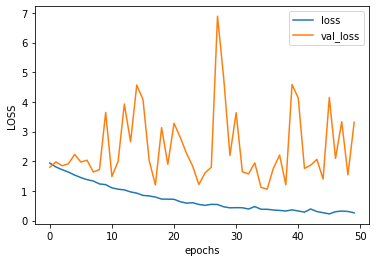

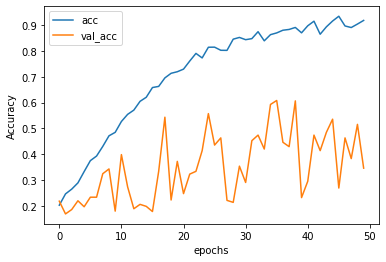

valid accuracy: 0.345679 
test accuracy: 0.339506 
Total test time: 0:00:01.900660
evaluate Test accuracy: 0.33950618
evaluate valid accuracy: 0.34567901


In [ ]:
# import datetime                                            

# model = getmodel()

# start = datetime.datetime.now()

# fittedModel =      model.fit(X_train, Y_train,
#               batch_size= 30 ,
#               nb_epoch= 250 ,
#               verbose=2,
#               validation_data=(X_valid, Y_valid) ) 


# # ,steps_per_epoch=1 ) #validation_steps=1)





# end = datetime.datetime.now()
# elaps = end - start
# print('Total training time:' , str(elaps))

# model.summary()



# #### ploting (accuracy,loss) of (test,train) for model
# ######
# import matplotlib.pyplot as plt
# b = fittedModel.history
# loss = b['loss']
# val_loss = b['val_loss']
# val_acc = b['val_acc']
# acc = b['acc']
# plt.xlabel('epochs')
# plt.ylabel('LOSS')
# plt.plot(loss)
# plt.plot(val_loss)
# plt.legend(['loss', 'val_loss'])
# plt.show()
# plt.figure()
# plt.xlabel('epochs')
# plt.ylabel('Accuracy')
# plt.plot(acc)
# plt.plot(val_acc)
# plt.legend(['acc', 'val_acc'])
# plt.show()




# probs       = model.predict(X_valid, batch_size=1)
# preds       = probs.argmax(axis = -1)
# acc         = np.mean(preds == Y_valid.argmax(axis=-1))
# print("valid accuracy: %f " % (acc))



# ####
# start = datetime.datetime.now()
# probs       = model.predict(X_test, batch_size=1)
# preds       = probs.argmax(axis = -1)
# acc         = np.mean(preds == Y_test.argmax(axis=-1))
# print("test accuracy: %f " % (acc))
# end = datetime.datetime.now()
# elaps = end - start
# print('Total test time:' , str(elaps))



# #####
# score, acc = model.evaluate(X_test , Y_test, batch_size=1, verbose=0)
# print('evaluate Test accuracy:', acc)

# ###
# score, acc = model.evaluate(X_valid, Y_valid, batch_size=1, verbose=0)
# print('evaluate valid accuracy:', acc)

In [ ]:
# x_train = []
# y_train = []

# x_train = np.concatenate((X_train ,X_valid ),axis=0)
# y_train = np.concatenate((Y_train ,Y_valid ),axis=0)

In [ ]:
# print('x_train:', x_train.shape)
# print('y_train' , y_train.shape)

x_train: (3618, 60, 800, 1)
y_train (3618, 6)


In [ ]:
# x_train = x_train[0:3600,:,:,:] 
# y_train = y_train[0:3600,:]

In [ ]:
# print('x_train:', x_train.shape)
# print('y_train' , y_train.shape)

x_train: (3600, 60, 800, 1)
y_train (3600, 6)


In [ ]:
# ###############
# from keras.models import load_model
# from sklearn.model_selection import KFold          

# # Create the k-folds cross-validator
# num_folds = 5
# kfold = KFold(n_splits = num_folds , shuffle = False)
# print('kfold:' , kfold)
# #############
# #######
# ###
# num_epochs = 250
# train_acc = []
# test_acc = []

# train_loss = []
# test_loss = []

# fold_index = 1
# SUM = 0

# # Train model for each fold
# for train, test in kfold.split(x_train, y_train):

#     model = getmodel()
#     Y_trainn = y_train[train]
#     X_trainn = x_train[train]
#     Y_validd = y_train[test]
#     X_validd = x_train[test]

#     # history = model.fit( X_trainn , Y_trainn , batch_size = 45 , nb_epoch=num_epochs , verbose=0 
#     #                     , validation_data=(X_validd, Y_validd) , validation_steps=1) 
#     file_path=f'/content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold{fold_index}.hdf5'
#     check_point= ModelCheckpoint(filepath=file_path, monitor='val_loss', verbose=1, save_best_only=True) 

#     history = model.fit(X_trainn, Y_trainn,
#               batch_size= 30 ,
#               epochs= num_epochs ,
#               verbose=0,
#               validation_data=(X_validd, Y_validd),callbacks=[lr_plat, check_point])
 
#     # Preserve the history and print out some basic stats
#     train_acc.append(history.history['accuracy'])
#     test_acc.append(history.history['val_accuracy'])
#     ###
#     train_loss.append(history.history['loss'])
#     test_loss.append(history.history['val_loss'])
#     ###
#     print('============================')
#     print("Fold %d:" % fold_index)
#     print("last accuracy of Training : %.2f%%" % (history.history['accuracy'][-1]*100))
#     print("last accuracy of validation : %.2f%%" % (history.history['val_accuracy'][-1]*100))
#     ###
#     model = load_model(f'/content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold{fold_index}.hdf5')
#     probs       = model.predict(X_test, batch_size=1)
#     preds       = probs.argmax(axis = -1)
#     acc         = np.mean(preds == Y_test.argmax(axis=-1))
#     print("test accuracy : %.2f%%" % (acc*100))
#     SUM = SUM + acc
#     #### ploting (accuracy,loss) of (test,train) for model
#     ################
#     import matplotlib.pyplot as plt
#     import matplotlib
#     matplotlib.rc('figure', figsize=(8,8))
#     b = history.history
#     loss = b['loss']
#     val_loss = b['val_loss']
#     val_acc = b['val_accuracy']
#     acc = b['accuracy']
#     plt.xlabel('epochs')
#     plt.ylabel('LOSS')
#     plt.plot(np.array(range(1,num_epochs+1)),loss)
#     plt.plot(np.array(range(1,num_epochs+1)),val_loss)
#     plt.legend(['loss', 'val_loss'])
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.show()
#     plt.figure()
#     plt.xlabel('epochs')
#     plt.ylabel('Accuracy')
#     plt.plot(np.array(range(1,num_epochs+1)),acc)
#     plt.plot(np.array(range(1,num_epochs+1)),val_acc)
#     plt.legend(['accuracy', 'val_accuracy'])
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.show()
#     ##############################################
#     #########################
#     ###########################  
#     #####    scores
#     print('===============================================')
#     from sklearn.metrics import accuracy_score
#     from sklearn.metrics import precision_score
#     from sklearn.metrics import recall_score
#     from sklearn.metrics import f1_score
#     from sklearn.metrics import cohen_kappa_score
#     from sklearn.metrics import roc_auc_score
#     from sklearn.metrics import confusion_matrix
#     ### predict probabilities for test set
#     yhat_probs = model.predict(X_test, verbose=0)
#     yhat_classes  = yhat_probs.argmax(axis = -1)
#     true       = Y_test.argmax(axis = -1)
#     ##
#     accuracy = accuracy_score(true, yhat_classes)
#     print('Accuracy: %f' % accuracy)
#     accuracy = accuracy_score(true, yhat_classes , normalize=False)
#     print('Only number of true prediction:',accuracy)
#     ### precision tp / (tp + fp)
#     ### precision = precision_score(Y_test, yhat_classes)
#     precision = precision_score(true, yhat_classes,average='macro')
#     print('Precision: %f' % precision)
#     ### recall: tp / (tp + fn)
#     ### recall = recall_score(Y_test, yhat_classes)
#     recall = recall_score(true, yhat_classes,average='macro')
#     print('Recall: %f' % recall)
#     ### f1: 2 tp / (2 tp + fp + fn)
#     ### f1 = f1_score(Y_test, yhat_classes)
#     f1 = f1_score(true, yhat_classes , average='macro')
#     print('F1 score: %f' % f1)
#     ### kappa = cohen_kappa_score(Y_test, yhat_classes)
#     kappa = cohen_kappa_score(true, yhat_classes)
#     print('Cohens kappa: %f' % kappa)
#     ### ROC AUC
#     auc = roc_auc_score(Y_test, yhat_probs, average='macro')
#     print('ROC AUC: %f' % auc)
#     ### confusion matrix
#     matrix = confusion_matrix(true, yhat_classes)
#     print(matrix)
#     ###############
#     ######
#     print('============================')
#     from sklearn.metrics import classification_report
#     yhat_probs = model.predict(X_test, verbose=0)
#     yhat_classes  = yhat_probs.argmax(axis = -1)
#     true       = Y_test.argmax(axis = -1)
#     # target_names = ['class 0', 'class 1']
#     target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
#     print(classification_report(true, yhat_classes,target_names=target_names))
#     ##############
#     ######
#     print('============================')
#     import numpy as np
#     from sklearn.metrics import confusion_matrix
#     yhat_probs = model.predict(X_test, verbose=0)
#     yhat_classes  = yhat_probs.argmax(axis = -1)
#     true       = Y_test.argmax(axis = -1)
#     cnf_matrix = confusion_matrix(true, yhat_classes)
#     print('confusion matrix:')
#     print(cnf_matrix)
#     FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
#     print('FP:' , FP)
#     FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
#     print('FN:' , FN)
#     TP = np.diag(cnf_matrix)
#     print('TP:', TP)
#     TN = cnf_matrix.sum() - (FP + FN + TP)
#     print('TN:', TN)
#     FP = FP.astype(float)
#     FN = FN.astype(float)
#     TP = TP.astype(float)
#     TN = TN.astype(float)
#     print('scores for each class:')
#     # Sensitivity, hit rate, recall, or true positive rate
#     TPR = TP/(TP+FN)
#     print('TPR:' ,TPR)
#     # Specificity or true negative rate
#     TNR = TN/(TN+FP) 
#     print('TNR:' ,TNR)
#     # Precision or positive predictive value
#     PPV = TP/(TP+FP)
#     print('PPV:' ,PPV)
#     # Negative predictive value
#     NPV = TN/(TN+FN)
#     print('NPV:' ,NPV)
#     # Fall out or false positive rate
#     FPR = FP/(FP+TN)
#     print('FPR:' ,FPR)
#     # False negative rate
#     FNR = FN/(TP+FN)
#     print('FNR:' ,FNR)
#     # False discovery rate
#     FDR = FP/(TP+FP)
#     print('FDR:' ,FDR)
#     # Overall accuracy
#     ACC = (TP+TN)/(TP+FP+FN+TN)
#     print('Accuracy for each class:' , ACC) 
#     #############################
#     ###############
#     ######
#     print('============================')
#     #### confusion matrix
#     # simple confusion matrix
#     from sklearn.metrics import confusion_matrix
#     probs       = model.predict(X_test,batch_size=1)
#     preds       = probs.argmax(axis = -1)
#     true       = Y_test.argmax(axis = -1)
#     confusion_matrix(true, preds)
#     # beautiful confusion matrix
#     # !pip install -q tensorflow-gpu==2.0.0-beta1
#     from tensorflow.keras import datasets, layers, models
#     import matplotlib.pyplot as plt
#     import tensorflow as tf
#     import numpy as np
#     import seaborn as sns
#     import pandas as pd
#     classes=[0,1,2,3,4,5]
#     y_true  = Y_test.argmax(axis = -1)
#     y_pred = model.predict(X_test, verbose=0)
#     y_pred = y_pred.argmax(axis = -1)
#     ##
#     matplotlib.rc('figure', figsize=(10,10))
#     matrix = confusion_matrix(true, y_pred)
#     # con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
#     # con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
#     import matplotlib
#     font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 10}
#     matplotlib.rc('font', **font)
#     con_mat_df = pd.DataFrame(matrix,index = classes, columns = classes)
#     figure = plt.figure(figsize=(6,6))
#     sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.show()
# #########################
#     #### save model
#     model.save(f'/content/drive/MyDrive/EEG_result/edge/2/fold{fold_index}.h5')

#     ### ROC CURVE && Model
#     #########
#     #####
#     # Compute ROC curve and ROC area for each class
#     from sklearn.metrics import roc_curve, auc
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     yhat_probs =  model.predict(X_test, batch_size=1)
#     for i in range(6):
#         fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], yhat_probs[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), yhat_probs.ravel())
#     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#     ###
#     from itertools import cycle
#     from scipy import interp

#     lw = 2
#     num_class=0
#     # First aggregate all false positive rates
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(6)]))
#     # Then interpolate all ROC curves at this points
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(6):
#         mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
#     # Finally average it and compute AUC
#     mean_tpr /= 6
#     fpr["macro"] = all_fpr
#     tpr["macro"] = mean_tpr
#     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
#     # # Plot all ROC curves
#     import matplotlib
#     matplotlib.rc('figure', figsize=(8, 8))
#     # mpl.rcParams.update({'font.size': 20})
#     font = {'family' : 'normal',
#             'weight' : 'normal',
#             'size'   : 21}
#     matplotlib.rc('font', **font)
#     ##
#     plt.figure()
#     # plt.plot(fpr["micro"], tpr["micro"],
#     #          label='micro-average ROC curve (area = {0:0.2f})'
#     #                ''.format(roc_auc["micro"]),
#     #          color='deeppink', linestyle=':', linewidth=4)

#     plt.plot(fpr["macro"], tpr["macro"],
#             label='macro-average ROC curve (area = {0:0.2f})'
#                   ''.format(roc_auc["macro"]),
#             color='navy', linestyle=':', linewidth=4)
#     colors = cycle(['aqua', 'darkorange', 'cornflowerblue','limegreen','magenta','red'])
#     for i, color in zip(range(6), colors):
#         plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                 label='ROC curve of class {0} (area = {1:0.2f})'
#                 ''.format(i+1, roc_auc[i]))
#     ####
#     plt.plot([0, 1], [0, 1], 'k--', lw=lw)
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve (AUC)',fontsize='small')
#     plt.legend(loc="lower right",fontsize='xx-small') 
#     plt.savefig(f'/content/drive/MyDrive/EEG_result/edge/2/ROC Curve fold{fold_index}(AUC).png',dpi= 250) 
#     plt.show()

#     fold_index += 1
# #########################   
# ############

# SUM = SUM / 5
# SUM = SUM * 100
# print(' Mean accuracy of test K FOLD : ' , SUM )
# print('==========')


# ######################
# ###### first plot
# ###
# import matplotlib.pyplot as plt
# # Set up the plot
# import matplotlib
# matplotlib.rc('figure', figsize=(8, 8))
# # mpl.rcParams.update({'font.size': 20})
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 20}
# matplotlib.rc('font', **font)
# ##
# plt.figure()
# plt.title('k-Fold Cross-Validation Performance')
# # plt.ylim(0.2, 1.01)
# plt.xlabel("Epoch")
# plt.ylabel("Score(accuracy)")
# plt.grid()
# ##
# import numpy as np
# # Calculate mean and distribution of training history
# train_scores_mean = np.mean(train_acc, axis=0)
# train_scores_std = np.std(train_acc, axis=0)
# test_scores_mean = np.mean(test_acc, axis=0)
# test_scores_std = np.std(test_acc, axis=0)
# # Plot the average scores
# plt.plot(np.array(range(1,num_epochs+1)),train_scores_mean,'-',color="green",label="Train accuracy",linewidth=2.5)
# plt.plot(np.array(range(1,num_epochs+1)),test_scores_mean,'-',color="red",label="Val accuracy",linewidth=2.5)
# # Plot a shaded area to represent the score distribution
# # epochs = list(range(num_epochs+1))
# plt.fill_between(np.array(range(1,num_epochs+1)),train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="g")
# plt.fill_between(np.array(range(1,num_epochs+1)),test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="r")
# plt.legend(loc="lower right")
# plt.savefig('/content/drive/MyDrive/EEG_result/edge/2/k-Fold Cross-Validation Performance(accuracy).png',dpi= 250)
# plt.xlim((1,num_epochs))
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()
 

# ###############################
# ############## second plot
# ###
# import matplotlib.pyplot as plt
# # Set up the plot
# import matplotlib
# matplotlib.rc('figure', figsize=(8, 8))
# # mpl.rcParams.update({'font.size': 20})
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 20}
# matplotlib.rc('font', **font)
# ###
# plt.figure()
# plt.title('k-Fold Cross-Validation Performance')
# # plt.ylim(0.2, 1.01)
# plt.xlabel("Epoch")
# plt.ylabel("Score(loss)")
# plt.grid()
# ###
# import numpy as np
# # Calculate mean and distribution of training history
# train_scores_mean = np.mean(train_loss, axis=0)
# train_scores_std = np.std(train_loss, axis=0)
# test_scores_mean = np.mean(test_loss, axis=0)
# test_scores_std = np.std(test_loss, axis=0)
# # Plot the average scores
# plt.plot(np.array(range(1,num_epochs+1)),train_scores_mean,'-',color="green",label="Train loss",linewidth=2.5)
# plt.plot(np.array(range(1,num_epochs+1)),test_scores_mean,'-',color="red",label="Val loss",linewidth=2.5)
# # Plot a shaded area to represent the score distribution
# # epochs = list(range(num_epochs))
# plt.fill_between(np.array(range(1,num_epochs+1)),train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="g")
# plt.fill_between(np.array(range(1,num_epochs+1)),test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="r")
# ###
# plt.legend(loc="up right")
# plt.savefig('/content/drive/MyDrive/EEG_result/edge/2/k-Fold Cross-Validation Performance(loss).png',dpi= 250)
# plt.xlim((1,num_epochs)) 
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()



# print('=========================')



1

Epoch 1: loss improved from inf to 1.88337, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold1.hdf5

Epoch 2: loss improved from 1.88337 to 1.82744, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold1.hdf5

Epoch 3: loss improved from 1.82744 to 1.79491, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold1.hdf5

Epoch 4: loss improved from 1.79491 to 1.77198, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold1.hdf5

Epoch 5: loss improved from 1.77198 to 1.74158, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold1.hdf5

Epoch 6: loss improved from 1.74158 to 1.68524, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold1.hdf5

Epoch 7: loss improved from 1.68524 to 1.63723, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold1.hdf5

Epoch 8: loss improved from 1.63723 to 1.58222, saving model to /content/drive/MyDri

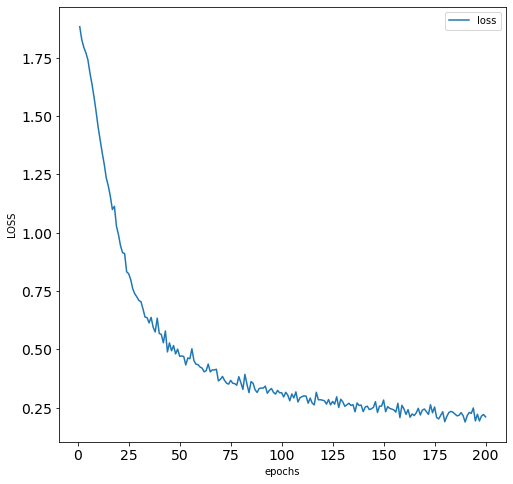

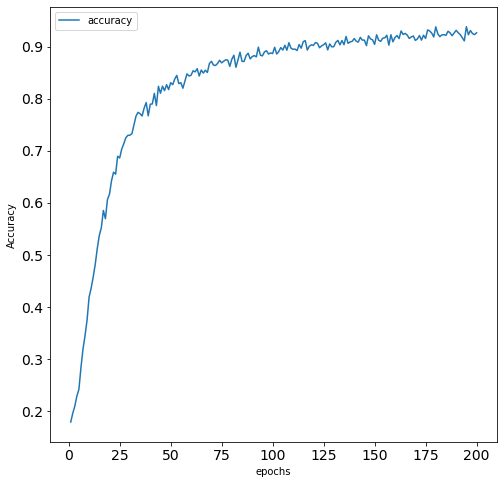

Accuracy: 0.771127
Only number of true prediction: 657
Precision: 0.788453
Recall: 0.771127
F1 score: 0.770128
Cohens kappa: 0.725352
ROC AUC: 0.958768
[[119   4  13   3   2   1]
 [ 21  93   9  12   4   3]
 [  3   9  96  14   6  14]
 [  0   0   2 106   4  30]
 [  0   4   1   2 104  31]
 [  0   0   0   2   1 139]]
              precision    recall  f1-score   support

     class 0       0.83      0.84      0.84       142
     class 1       0.85      0.65      0.74       142
     class 2       0.79      0.68      0.73       142
     class 3       0.76      0.75      0.75       142
     class 4       0.86      0.73      0.79       142
     class 5       0.64      0.98      0.77       142

    accuracy                           0.77       852
   macro avg       0.79      0.77      0.77       852
weighted avg       0.79      0.77      0.77       852

confusion matrix:
[[119   4  13   3   2   1]
 [ 21  93   9  12   4   3]
 [  3   9  96  14   6  14]
 [  0   0   2 106   4  30]
 [  0   4   1   

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


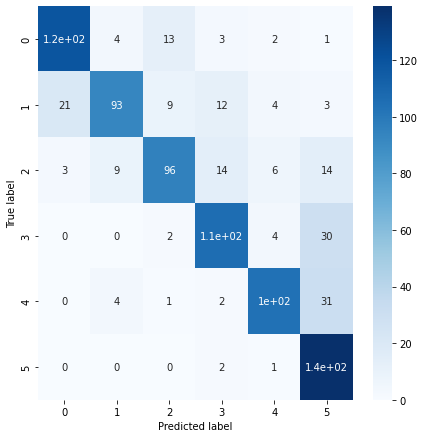

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


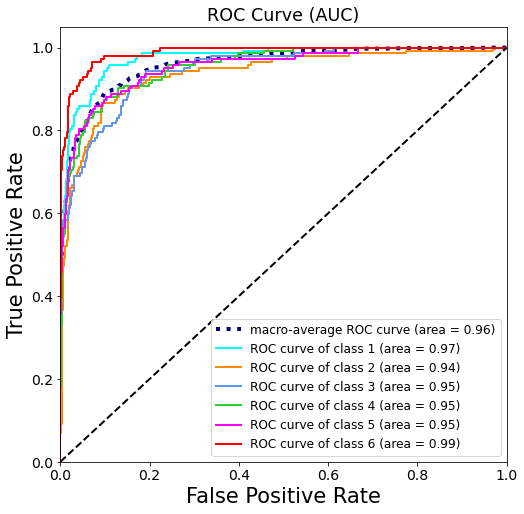

2

Epoch 1: loss improved from inf to 1.89442, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold2.hdf5

Epoch 2: loss improved from 1.89442 to 1.83364, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold2.hdf5

Epoch 3: loss improved from 1.83364 to 1.78210, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold2.hdf5

Epoch 4: loss improved from 1.78210 to 1.77325, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold2.hdf5

Epoch 5: loss improved from 1.77325 to 1.73625, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold2.hdf5

Epoch 6: loss improved from 1.73625 to 1.68922, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold2.hdf5

Epoch 7: loss improved from 1.68922 to 1.63247, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold2.hdf5

Epoch 8: loss improved from 1.63247 to 1.55269, saving model to /content/drive/MyDri

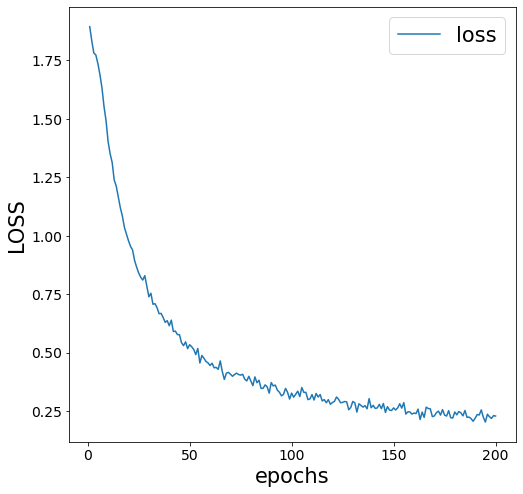

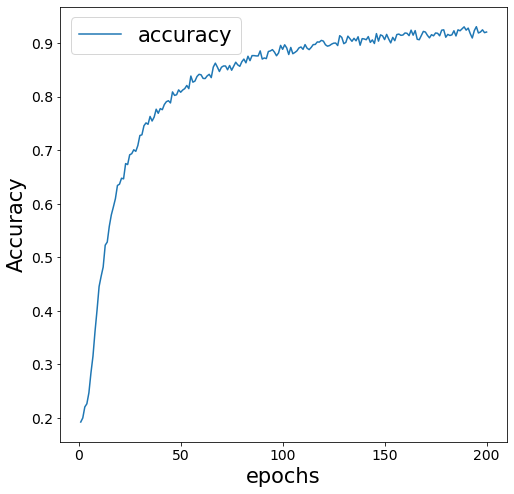

Accuracy: 0.769953
Only number of true prediction: 656
Precision: 0.786118
Recall: 0.769953
F1 score: 0.770607
Cohens kappa: 0.723944
ROC AUC: 0.961397
[[111   9   7   9   2   4]
 [ 14 103   2  11   4   8]
 [  4   3  94  11  16  14]
 [  2   1   1 111   4  23]
 [  0   5   3   3 107  24]
 [  0   0   2   5   5 130]]
              precision    recall  f1-score   support

     class 0       0.85      0.78      0.81       142
     class 1       0.85      0.73      0.78       142
     class 2       0.86      0.66      0.75       142
     class 3       0.74      0.78      0.76       142
     class 4       0.78      0.75      0.76       142
     class 5       0.64      0.92      0.75       142

    accuracy                           0.77       852
   macro avg       0.79      0.77      0.77       852
weighted avg       0.79      0.77      0.77       852

confusion matrix:
[[111   9   7   9   2   4]
 [ 14 103   2  11   4   8]
 [  4   3  94  11  16  14]
 [  2   1   1 111   4  23]
 [  0   5   3   

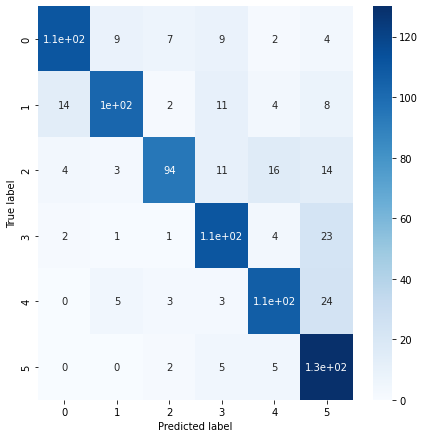

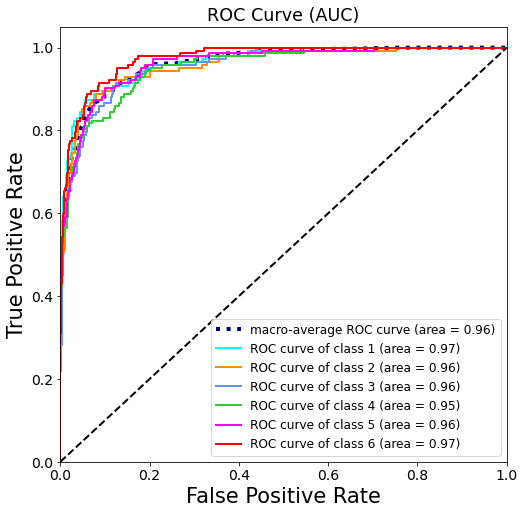

3

Epoch 1: loss improved from inf to 1.90280, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold3.hdf5

Epoch 2: loss improved from 1.90280 to 1.82854, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold3.hdf5

Epoch 3: loss improved from 1.82854 to 1.79288, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold3.hdf5

Epoch 4: loss improved from 1.79288 to 1.77181, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold3.hdf5

Epoch 5: loss improved from 1.77181 to 1.74392, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold3.hdf5

Epoch 6: loss improved from 1.74392 to 1.70737, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold3.hdf5

Epoch 7: loss improved from 1.70737 to 1.63766, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold3.hdf5

Epoch 8: loss improved from 1.63766 to 1.55838, saving model to /content/drive/MyDri

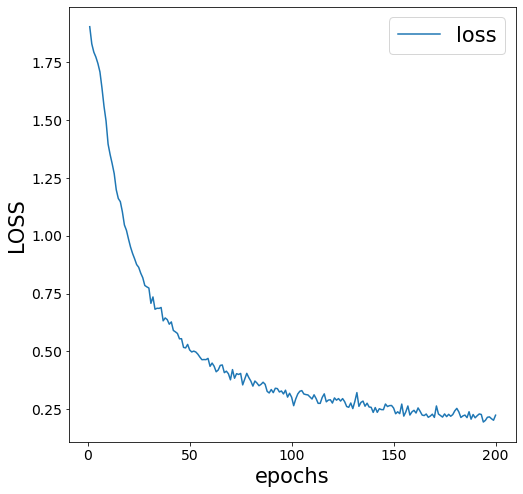

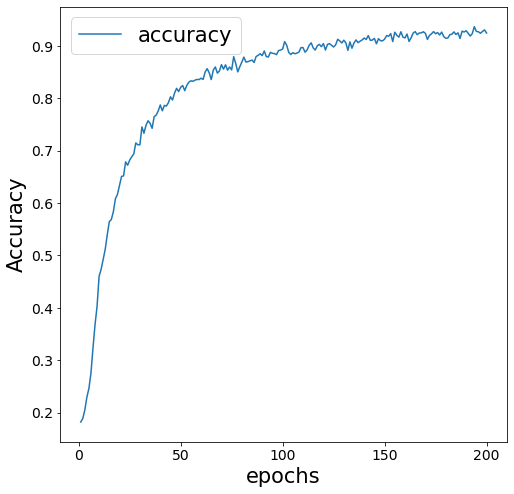

Accuracy: 0.769953
Only number of true prediction: 656
Precision: 0.774058
Recall: 0.769953
F1 score: 0.769882
Cohens kappa: 0.723944
ROC AUC: 0.954706
[[111   8  10   6   2   5]
 [ 16 101   3  13   6   3]
 [  6   7 100   7  15   7]
 [  1   4   2 112  18   5]
 [  0   3   9   3 112  15]
 [  3   0   1   8  10 120]]
              precision    recall  f1-score   support

     class 0       0.81      0.78      0.80       142
     class 1       0.82      0.71      0.76       142
     class 2       0.80      0.70      0.75       142
     class 3       0.75      0.79      0.77       142
     class 4       0.69      0.79      0.73       142
     class 5       0.77      0.85      0.81       142

    accuracy                           0.77       852
   macro avg       0.77      0.77      0.77       852
weighted avg       0.77      0.77      0.77       852

confusion matrix:
[[111   8  10   6   2   5]
 [ 16 101   3  13   6   3]
 [  6   7 100   7  15   7]
 [  1   4   2 112  18   5]
 [  0   3   9   

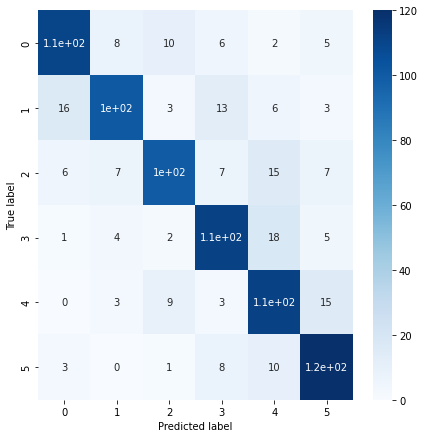

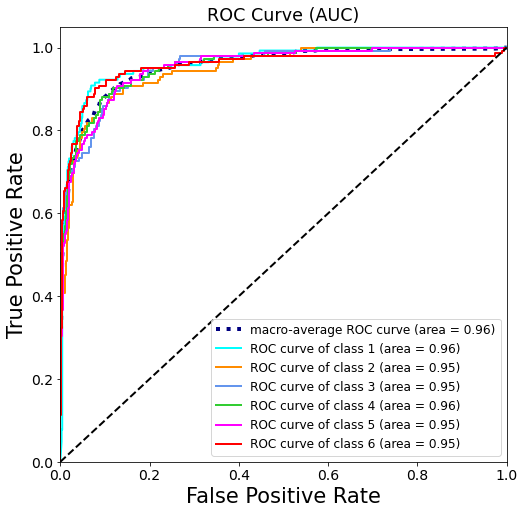

4

Epoch 1: loss improved from inf to 1.89416, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold4.hdf5

Epoch 2: loss improved from 1.89416 to 1.83072, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold4.hdf5

Epoch 3: loss improved from 1.83072 to 1.79812, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold4.hdf5

Epoch 4: loss improved from 1.79812 to 1.77124, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold4.hdf5

Epoch 5: loss improved from 1.77124 to 1.72501, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold4.hdf5

Epoch 6: loss improved from 1.72501 to 1.67472, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold4.hdf5

Epoch 7: loss improved from 1.67472 to 1.62628, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold4.hdf5

Epoch 8: loss improved from 1.62628 to 1.53317, saving model to /content/drive/MyDri

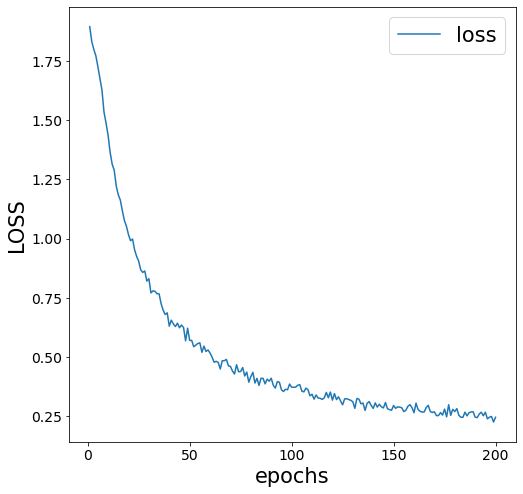

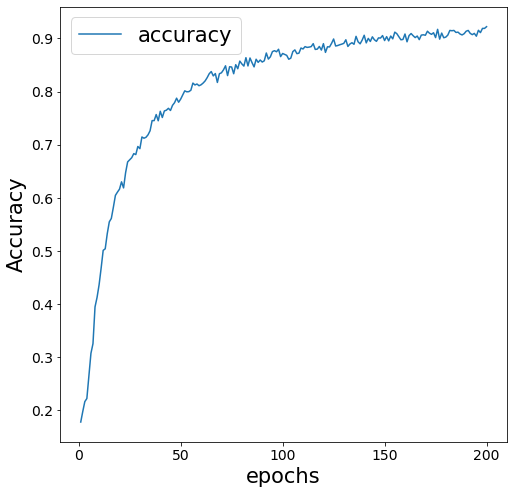

Accuracy: 0.792254
Only number of true prediction: 675
Precision: 0.794037
Recall: 0.792254
F1 score: 0.791457
Cohens kappa: 0.750704
ROC AUC: 0.966979
[[113  11   5   5   5   3]
 [  9 116   4  10   2   1]
 [  6   8 101   7  10  10]
 [  3   6   1 115   6  11]
 [  3   2  10   9 104  14]
 [  0   2   3   4   7 126]]
              precision    recall  f1-score   support

     class 0       0.84      0.80      0.82       142
     class 1       0.80      0.82      0.81       142
     class 2       0.81      0.71      0.76       142
     class 3       0.77      0.81      0.79       142
     class 4       0.78      0.73      0.75       142
     class 5       0.76      0.89      0.82       142

    accuracy                           0.79       852
   macro avg       0.79      0.79      0.79       852
weighted avg       0.79      0.79      0.79       852

confusion matrix:
[[113  11   5   5   5   3]
 [  9 116   4  10   2   1]
 [  6   8 101   7  10  10]
 [  3   6   1 115   6  11]
 [  3   2  10   

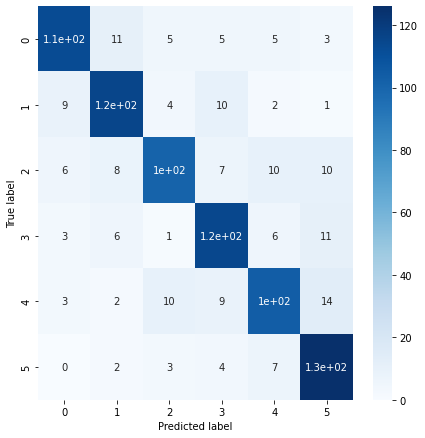

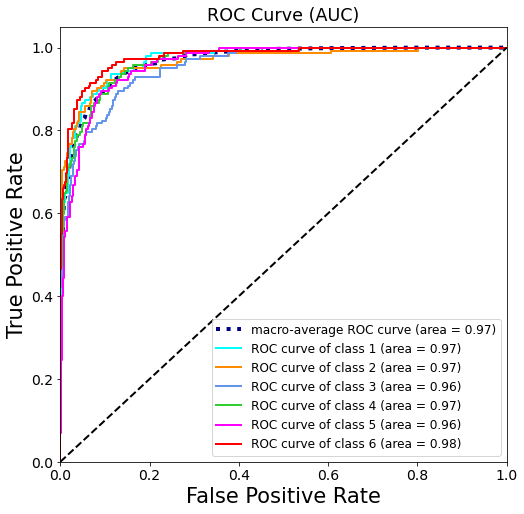

5

Epoch 1: loss improved from inf to 1.87905, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold5.hdf5

Epoch 2: loss improved from 1.87905 to 1.82533, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold5.hdf5

Epoch 3: loss improved from 1.82533 to 1.80382, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold5.hdf5

Epoch 4: loss improved from 1.80382 to 1.76903, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold5.hdf5

Epoch 5: loss improved from 1.76903 to 1.75055, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold5.hdf5

Epoch 6: loss improved from 1.75055 to 1.71460, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold5.hdf5

Epoch 7: loss improved from 1.71460 to 1.66041, saving model to /content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold5.hdf5

Epoch 8: loss improved from 1.66041 to 1.57937, saving model to /content/drive/MyDri

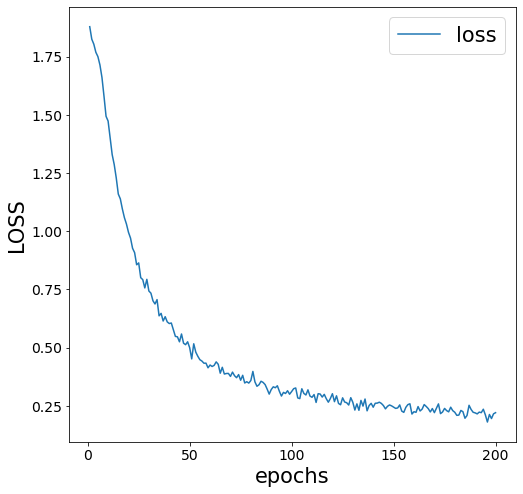

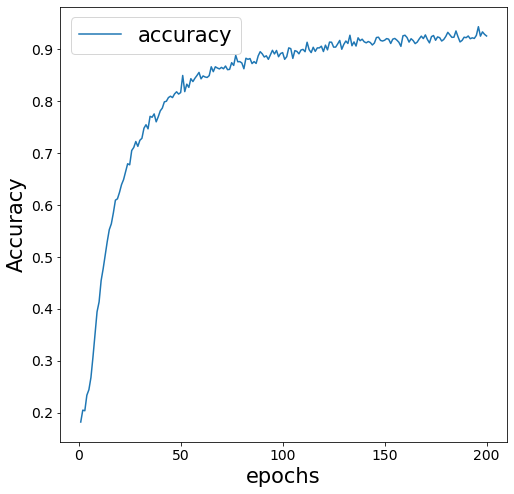

Accuracy: 0.791080
Only number of true prediction: 674
Precision: 0.798401
Recall: 0.791080
F1 score: 0.789826
Cohens kappa: 0.749296
ROC AUC: 0.962658
[[104  16   9   9   3   1]
 [  5  93  16  13   6   9]
 [  3   3 114  10   5   7]
 [  1   0   0 113  16  12]
 [  1   0   5   4 120  12]
 [  0   1   1   7   3 130]]
              precision    recall  f1-score   support

     class 0       0.91      0.73      0.81       142
     class 1       0.82      0.65      0.73       142
     class 2       0.79      0.80      0.79       142
     class 3       0.72      0.80      0.76       142
     class 4       0.78      0.85      0.81       142
     class 5       0.76      0.92      0.83       142

    accuracy                           0.79       852
   macro avg       0.80      0.79      0.79       852
weighted avg       0.80      0.79      0.79       852

confusion matrix:
[[104  16   9   9   3   1]
 [  5  93  16  13   6   9]
 [  3   3 114  10   5   7]
 [  1   0   0 113  16  12]
 [  1   0   5   

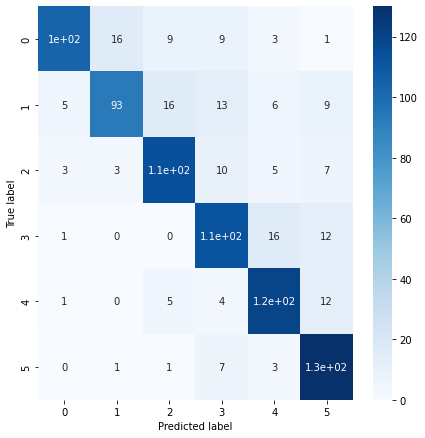

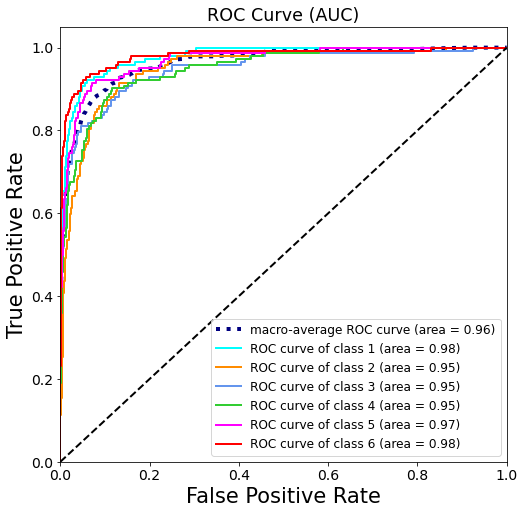

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


 Mean accuracy of test K FOLD :  77.88732394366195


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


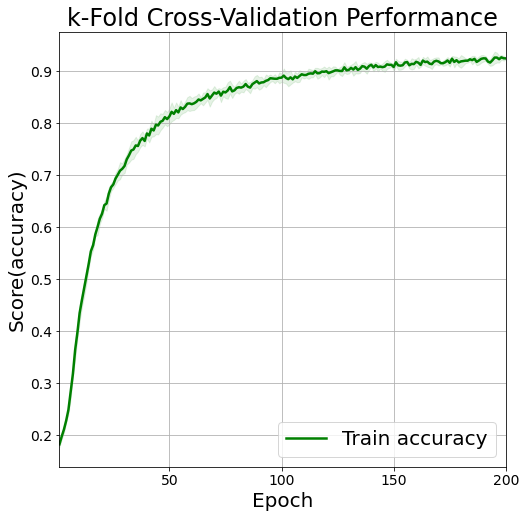

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:384: MatplotlibDeprecationWarning: Unrecognized location 'up right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


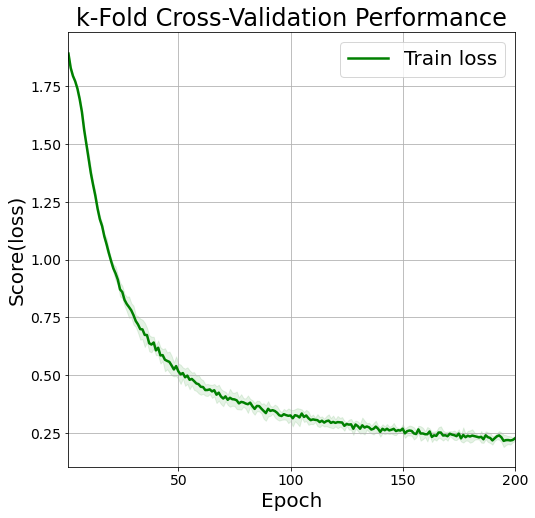

In [ ]:
################################################################################
###############
from keras.models import load_model
from sklearn.model_selection import KFold          
#############
#######
###
num_epochs = 200
train_acc = []
test_acc = []

train_loss = []
test_loss = []

fold_index = 1
SUM = 0

# Train model for each fold
import datetime
for i in range(5):
    print(i+1)
    model = getmodel()
    start = datetime.datetime.now()
    file_path=f'/content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold{fold_index}.hdf5'
    # check_point= ModelCheckpoint(filepath=file_path, monitor='val_loss', verbose=1, save_best_only=True) 
    check_point= ModelCheckpoint(filepath=file_path, monitor='loss', verbose=1, save_best_only=True) 
    history = model.fit(overall_xtrain_allfold[i], overall_ytrain_allfold[i],
                  batch_size= 30 ,
                  epochs=num_epochs,
                  verbose=0,
                  shuffle= True, callbacks=[check_point])
 
    end = datetime.datetime.now()
    elaps = end - start
    print('Total training time:' , str(elaps))


    # Preserve the history and print out some basic stats
    train_acc.append(history.history['accuracy'])
    # test_acc.append(history.history['val_accuracy'])
    ###
    train_loss.append(history.history['loss'])
    # test_loss.append(history.history['val_loss'])
    ###
    print('============================')
    print("Fold %d:" % fold_index)
    print("last accuracy of Training : %.2f%%" % (history.history['accuracy'][-1]*100))
    # print("last accuracy of validation : %.2f%%" % (history.history['val_accuracy'][-1]*100))
    ###
    model = load_model(f'/content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold{fold_index}.hdf5')
    probs       = model.predict(overall_xtest_allfold[i], batch_size=1)
    preds       = probs.argmax(axis = -1)
    acc         = np.mean(preds == overall_ytest_allfold[i].argmax(axis=-1))
    print("test accuracy : %.2f%%" % (acc*100))
    SUM = SUM + acc
    #### ploting (accuracy,loss) of (test,train) for model
    ################
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.rc('figure', figsize=(8,8))
    b = history.history
    loss = b['loss']
    # val_loss = b['val_loss']
    # val_acc = b['val_accuracy']
    acc = b['accuracy']
    plt.xlabel('epochs')
    plt.ylabel('LOSS')
    plt.plot(np.array(range(1,num_epochs+1)),loss)
    # plt.plot(np.array(range(1,num_epochs+1)),val_loss)
    # plt.legend(['loss', 'val_loss'])
    plt.legend(['loss'])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
    plt.figure()
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.plot(np.array(range(1,num_epochs+1)),acc)
    # plt.plot(np.array(range(1,num_epochs+1)),val_acc)
    # plt.legend(['accuracy', 'val_accuracy'])
    plt.legend(['accuracy'])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
    ##############################################
    #########################
    ###########################  
    #####    scores
    print('===============================================')
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import cohen_kappa_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import confusion_matrix
    ### predict probabilities for test set
    yhat_probs = model.predict(overall_xtest_allfold[i], verbose=0)
    yhat_classes  = yhat_probs.argmax(axis = -1)
    true       = overall_ytest_allfold[i].argmax(axis = -1)
    ##
    accuracy = accuracy_score(true, yhat_classes)
    print('Accuracy: %f' % accuracy)
    accuracy = accuracy_score(true, yhat_classes , normalize=False)
    print('Only number of true prediction:',accuracy)
    ### precision tp / (tp + fp)
    ### precision = precision_score(Y_test, yhat_classes)
    precision = precision_score(true, yhat_classes,average='macro')
    print('Precision: %f' % precision)
    ### recall: tp / (tp + fn)
    ### recall = recall_score(Y_test, yhat_classes)
    recall = recall_score(true, yhat_classes,average='macro')
    print('Recall: %f' % recall)
    ### f1: 2 tp / (2 tp + fp + fn)
    ### f1 = f1_score(Y_test, yhat_classes)
    f1 = f1_score(true, yhat_classes , average='macro')
    print('F1 score: %f' % f1)
    ### kappa = cohen_kappa_score(Y_test, yhat_classes)
    kappa = cohen_kappa_score(true, yhat_classes)
    print('Cohens kappa: %f' % kappa)
    ### ROC AUC
    auc = roc_auc_score(overall_ytest_allfold[i], yhat_probs, average='macro')
    print('ROC AUC: %f' % auc)
    ### confusion matrix
    matrix = confusion_matrix(true, yhat_classes)
    print(matrix)
    ###############
    ######
    print('============================')
    from sklearn.metrics import classification_report
    yhat_probs = model.predict(overall_xtest_allfold[i], verbose=0)
    yhat_classes  = yhat_probs.argmax(axis = -1)
    true       = overall_ytest_allfold[i].argmax(axis = -1)
    # target_names = ['class 0', 'class 1']
    target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
    print(classification_report(true, yhat_classes,target_names=target_names))
    ##############
    ######
    print('============================')
    import numpy as np
    from sklearn.metrics import confusion_matrix
    yhat_probs = model.predict(overall_xtest_allfold[i], verbose=0)
    yhat_classes  = yhat_probs.argmax(axis = -1)
    true       = overall_ytest_allfold[i].argmax(axis = -1)
    cnf_matrix = confusion_matrix(true, yhat_classes)
    print('confusion matrix:')
    print(cnf_matrix)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    print('FP:' , FP)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    print('FN:' , FN)
    TP = np.diag(cnf_matrix)
    print('TP:', TP)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    print('TN:', TN)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    print('scores for each class:')
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('TPR:' ,TPR)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print('TNR:' ,TNR)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('PPV:' ,PPV)
    # Negative predictive value
    NPV = TN/(TN+FN)
    print('NPV:' ,NPV)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print('FPR:' ,FPR)
    # False negative rate
    FNR = FN/(TP+FN)
    print('FNR:' ,FNR)
    # False discovery rate
    FDR = FP/(TP+FP)
    print('FDR:' ,FDR)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('Accuracy for each class:' , ACC) 
    #############################
    ###############
    ######
    print('============================')
    #### confusion matrix
    # simple confusion matrix
    from sklearn.metrics import confusion_matrix
    probs       = model.predict(overall_xtest_allfold[i],batch_size=1)
    preds       = probs.argmax(axis = -1)
    true       = overall_ytest_allfold[i].argmax(axis = -1)
    confusion_matrix(true, preds)
    # beautiful confusion matrix
    # !pip install -q tensorflow-gpu==2.0.0-beta1
    from tensorflow.keras import datasets, layers, models
    import matplotlib.pyplot as plt
    import tensorflow as tf
    import numpy as np
    import seaborn as sns
    import pandas as pd
    classes=[0,1,2,3,4,5]
    y_true  = overall_ytest_allfold[i].argmax(axis = -1)
    y_pred = model.predict(overall_xtest_allfold[i], verbose=0)
    y_pred = y_pred.argmax(axis = -1)
    ##
    matplotlib.rc('figure', figsize=(10,10))
    matrix = confusion_matrix(true, y_pred)
    # con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
    # con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    import matplotlib
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}
    matplotlib.rc('font', **font)
    con_mat_df = pd.DataFrame(matrix,index = classes, columns = classes)
    figure = plt.figure(figsize=(6,6))
    sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
#########################
    #### save model
    model.save(f'/content/drive/MyDrive/EEG_result/edge/2/fold{fold_index}.h5')

    ### ROC CURVE && Model
    #########
    #####
    # Compute ROC curve and ROC area for each class
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    yhat_probs =  model.predict(overall_xtest_allfold[i], batch_size=1)
    for j in range(6):
        fpr[j], tpr[j], _ = roc_curve(overall_ytest_allfold[i][:, j], yhat_probs[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    fpr["micro"], tpr["micro"], _ = roc_curve(overall_ytest_allfold[i].ravel(), yhat_probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    ###
    from itertools import cycle
    from scipy import interp

    lw = 2
    num_class=0
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[k] for k in range(6)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for ii in range(6):
        mean_tpr += np.interp(all_fpr, fpr[ii], tpr[ii])
    # Finally average it and compute AUC
    mean_tpr /= 6
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    # # Plot all ROC curves
    import matplotlib
    matplotlib.rc('figure', figsize=(8, 8))
    # mpl.rcParams.update({'font.size': 20})
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 21}
    matplotlib.rc('font', **font)
    ##
    plt.figure()
    # plt.plot(fpr["micro"], tpr["micro"],
    #          label='micro-average ROC curve (area = {0:0.2f})'
    #                ''.format(roc_auc["micro"]),
    #          color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','limegreen','magenta','red'])
    for i, color in zip(range(6), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i+1, roc_auc[i]))
    ####
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (AUC)',fontsize='small')
    plt.legend(loc="lower right",fontsize='xx-small') 
    plt.savefig(f'/content/drive/MyDrive/EEG_result/edge/2/ROC Curve fold{fold_index}(AUC).png',dpi= 250) 
    plt.show()

    fold_index += 1
#########################   
############

SUM = SUM / 5
SUM = SUM * 100
print(' Mean accuracy of test K FOLD : ' , SUM )
print('==========')


######################
###### first plot
###
import matplotlib.pyplot as plt
# Set up the plot
import matplotlib
matplotlib.rc('figure', figsize=(8, 8))
# mpl.rcParams.update({'font.size': 20})
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
##
plt.figure()
plt.title('k-Fold Cross-Validation Performance')
# plt.ylim(0.2, 1.01)
plt.xlabel("Epoch")
plt.ylabel("Score(accuracy)")
plt.grid()
##
import numpy as np
# Calculate mean and distribution of training history
train_scores_mean = np.mean(train_acc, axis=0)
train_scores_std = np.std(train_acc, axis=0)
# test_scores_mean = np.mean(test_acc, axis=0)
# test_scores_std = np.std(test_acc, axis=0)
# Plot the average scores
plt.plot(np.array(range(1,num_epochs+1)),train_scores_mean,'-',color="green",label="Train accuracy",linewidth=2.5)
# plt.plot(np.array(range(1,num_epochs+1)),test_scores_mean,'-',color="red",label="Val accuracy",linewidth=2.5)
# Plot a shaded area to represent the score distribution
# epochs = list(range(num_epochs+1))
plt.fill_between(np.array(range(1,num_epochs+1)),train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="g")
# plt.fill_between(np.array(range(1,num_epochs+1)),test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="r")
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/EEG_result/edge/2/k-Fold Cross-Validation Performance(accuracy).png',dpi= 250)
plt.xlim((1,num_epochs))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
 

###############################
############## second plot
###
import matplotlib.pyplot as plt
# Set up the plot
import matplotlib
matplotlib.rc('figure', figsize=(8, 8))
# mpl.rcParams.update({'font.size': 20})
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
###
plt.figure()
plt.title('k-Fold Cross-Validation Performance')
# plt.ylim(0.2, 1.01)
plt.xlabel("Epoch")
plt.ylabel("Score(loss)")
plt.grid()
###
import numpy as np
# Calculate mean and distribution of training history
train_scores_mean = np.mean(train_loss, axis=0)
train_scores_std = np.std(train_loss, axis=0)
# test_scores_mean = np.mean(test_loss, axis=0)
# test_scores_std = np.std(test_loss, axis=0)
# Plot the average scores
plt.plot(np.array(range(1,num_epochs+1)),train_scores_mean,'-',color="green",label="Train loss",linewidth=2.5)
# plt.plot(np.array(range(1,num_epochs+1)),test_scores_mean,'-',color="red",label="Val loss",linewidth=2.5)
# Plot a shaded area to represent the score distribution
# epochs = list(range(num_epochs))
plt.fill_between(np.array(range(1,num_epochs+1)),train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="g")
# plt.fill_between(np.array(range(1,num_epochs+1)),test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="r")
###
plt.legend(loc="up right")
plt.savefig('/content/drive/MyDrive/EEG_result/edge/2/k-Fold Cross-Validation Performance(loss).png',dpi= 250)
plt.xlim((1,num_epochs)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



print('=========================')

In [48]:
from keras.models import load_model
import tempfile
from tensorflow_model_optimization.sparsity import keras as sparsity
from tensorflow.keras.models import save_model
fold_index = 5
model = load_model(f'/content/drive/MyDrive/EEG_result/edge/2/my_best_model_fold{fold_index}.hdf5')
num_train_fold1 = len(overall_xtrain_allfold[fold_index - 1])
print(num_train_fold1)
# probs       = model.predict(overall_xtest_allfold[fold_index - 1], batch_size=1)
# preds       = probs.argmax(axis = -1)
# acc         = np.mean(preds == overall_ytest_allfold[fold_index - 1].argmax(axis=-1))
# print(acc)
score = model.evaluate(overall_xtest_allfold[fold_index - 1], overall_ytest_allfold[fold_index - 1], verbose=0)
print(score)
# Store file 
_, keras_file = tempfile.mkstemp('.h5')
save_model(model, keras_file, include_optimizer=False)
print(f'Baseline model saved: {keras_file}')

3408
[0.716361403465271, 0.7910798192024231]
Baseline model saved: /tmp/tmpy044xcq_.h5


In [49]:
# Load functionality for adding pruning wrappers
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

In [50]:
# Finish pruning after 5 epochs
pruning_epochs = 50
batch_size = 30
num_images = num_train_fold1
end_step = np.ceil(num_images / batch_size).astype(np.int32) * pruning_epochs

# Define pruning configuration
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.0,
                                                               final_sparsity=0.7,
                                                               begin_step=0,
                                                               end_step=end_step)
}
model_for_pruning = prune_low_magnitude(model, **pruning_params)

In [51]:
# Recompile the model
lrate=0.001
model_for_pruning.compile(loss='kullback_leibler_divergence',
              optimizer=Nadam(learning_rate=lrate),
              metrics=['accuracy'])

# Model callbacks
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep()
]

# Fitting data
model_for_pruning.fit(overall_xtrain_allfold[fold_index - 1], overall_ytrain_allfold[fold_index - 1],
                      batch_size=batch_size,
                      epochs=pruning_epochs,
                      verbose=1,
                      callbacks=callbacks)
# Generate generalization metrics
score_pruned = model_for_pruning.evaluate(overall_xtest_allfold[fold_index - 1], overall_ytest_allfold[fold_index - 1], verbose=0)
print(f'Pruned CNN - Test loss: {score_pruned[0]} / Test accuracy: {score_pruned[1]}')
print(f'Regular CNN - Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/50
114/114 [==============================] - 29s 164ms/step - loss: 0.2584 - accuracy: 0.9087
Epoch 2/50
114/114 [==============================] - 19s 168ms/step - loss: 0.2154 - accuracy: 0.9284
Epoch 3/50
114/114 [==============================] - 19s 168ms/step - loss: 0.2227 - accuracy: 0.9161
Epoch 4/50
114/114 [==============================] - 19s 163ms/step - loss: 0.2131 - accuracy: 0.9246
Epoch 5/50
114/114 [==============================] - 19s 166ms/step - loss: 0.2400 - accuracy: 0.9170
Epoch 6/50
114/114 [==============================] - 19s 167ms/step - loss: 0.2121 - accuracy: 0.9240
Epoch 7/50
114/114 [==============================] - 19s 167ms/step - loss: 0.2021 - accuracy: 0.9299
Epoch 8/50
114/114 [==============================] - 19s 169ms/step - loss: 0.1789 - accuracy: 0.9410
Epoch 9/50
114/114 [==============================] - 19s 165ms/step - loss: 0.1971 - accuracy: 0.9322
Epoch 10/50
114/114 [==============================] - 19s 165ms/step - l

In [52]:
final_model = sparsity.strip_pruning(model_for_pruning)

for i, w in enumerate(final_model.get_weights()):
    print(
        "{} -- Total:{}, Zeros: {:.2f}%".format(
            final_model.weights[i].name, w.size, np.sum(w == 0) / w.size * 100
        )
    )

conv2d_45/kernel:0 -- Total:13500, Zeros: 70.00%
conv2d_45/bias:0 -- Total:30, Zeros: 0.00%
batch_normalization_50/gamma:0 -- Total:30, Zeros: 0.00%
batch_normalization_50/beta:0 -- Total:30, Zeros: 0.00%
batch_normalization_50/moving_mean:0 -- Total:30, Zeros: 0.00%
batch_normalization_50/moving_variance:0 -- Total:30, Zeros: 0.00%
depthwise_conv2d_5/depthwise_kernel:0 -- Total:14400, Zeros: 0.00%
depthwise_conv2d_5/bias:0 -- Total:240, Zeros: 0.00%
batch_normalization_51/gamma:0 -- Total:240, Zeros: 0.00%
batch_normalization_51/beta:0 -- Total:240, Zeros: 0.00%
batch_normalization_51/moving_mean:0 -- Total:240, Zeros: 0.00%
batch_normalization_51/moving_variance:0 -- Total:240, Zeros: 0.00%
conv2d_46/kernel:0 -- Total:96000, Zeros: 70.00%
conv2d_46/bias:0 -- Total:8, Zeros: 0.00%
batch_normalization_52/gamma:0 -- Total:8, Zeros: 0.00%
batch_normalization_52/beta:0 -- Total:8, Zeros: 0.00%
batch_normalization_52/moving_mean:0 -- Total:8, Zeros: 0.00%
batch_normalization_52/moving_vari

In [53]:
# Export the model
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)
_, pruned_keras_file = tempfile.mkstemp('.h5')
save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print(f'Pruned model saved: {pruned_keras_file}')

Pruned model saved: /tmp/tmp8lbaa_64.h5


In [54]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))

Size of gzipped baseline Keras model: 1143087.00 bytes
Size of gzipped pruned Keras model: 526475.00 bytes
